In [2]:
import os
import pandas as pd
import numpy as np
from helpers import VolleyWrapper
import tqdm
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/Users/jniedziela/Developer/master/bpe/')

DATA_DIR = 'attack_pose_data/'
SCORES_DATA = 'attack_pose_data/pose_scores.xlsx'
JSON_DATA_DIR = 'attack_pose_data/json_files/'

/Users/jniedziela/.pyenv/versions/3.10.0/envs/bpe_2/lib/python3.10/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
scores = pd.read_excel(SCORES_DATA, index_col=0)[['pose_tabel', 'totaal_score']]
scores['json_file'] = scores['pose_tabel'].str.replace('.xlsx', '.json')
scores.sample(5)

pose_tabel  totaal_score  \
33        GX010046_Clip_19_POSE_tabel.xlsx      3.288889   
3   GX010036_Clip_4_sec_16_POSE_tabel.xlsx      3.350000   
2   GX010034_Clip_5_sec_15_POSE_tabel.xlsx      3.450000   
13        GX010044_Clip_16_POSE_tabel.xlsx      3.711111   
7    GX010040_Clip_2_sec_6_POSE_tabel.xlsx      2.611111   

                                 json_file  
33        GX010046_Clip_19_POSE_tabel.json  
3   GX010036_Clip_4_sec_16_POSE_tabel.json  
2   GX010034_Clip_5_sec_15_POSE_tabel.json  
13        GX010044_Clip_16_POSE_tabel.json  
7    GX010040_Clip_2_sec_6_POSE_tabel.json

## Calculate embeddings for each body part

Window size: 15


100%|██████████| 43/43 [00:04<00:00,  9.24it/s]


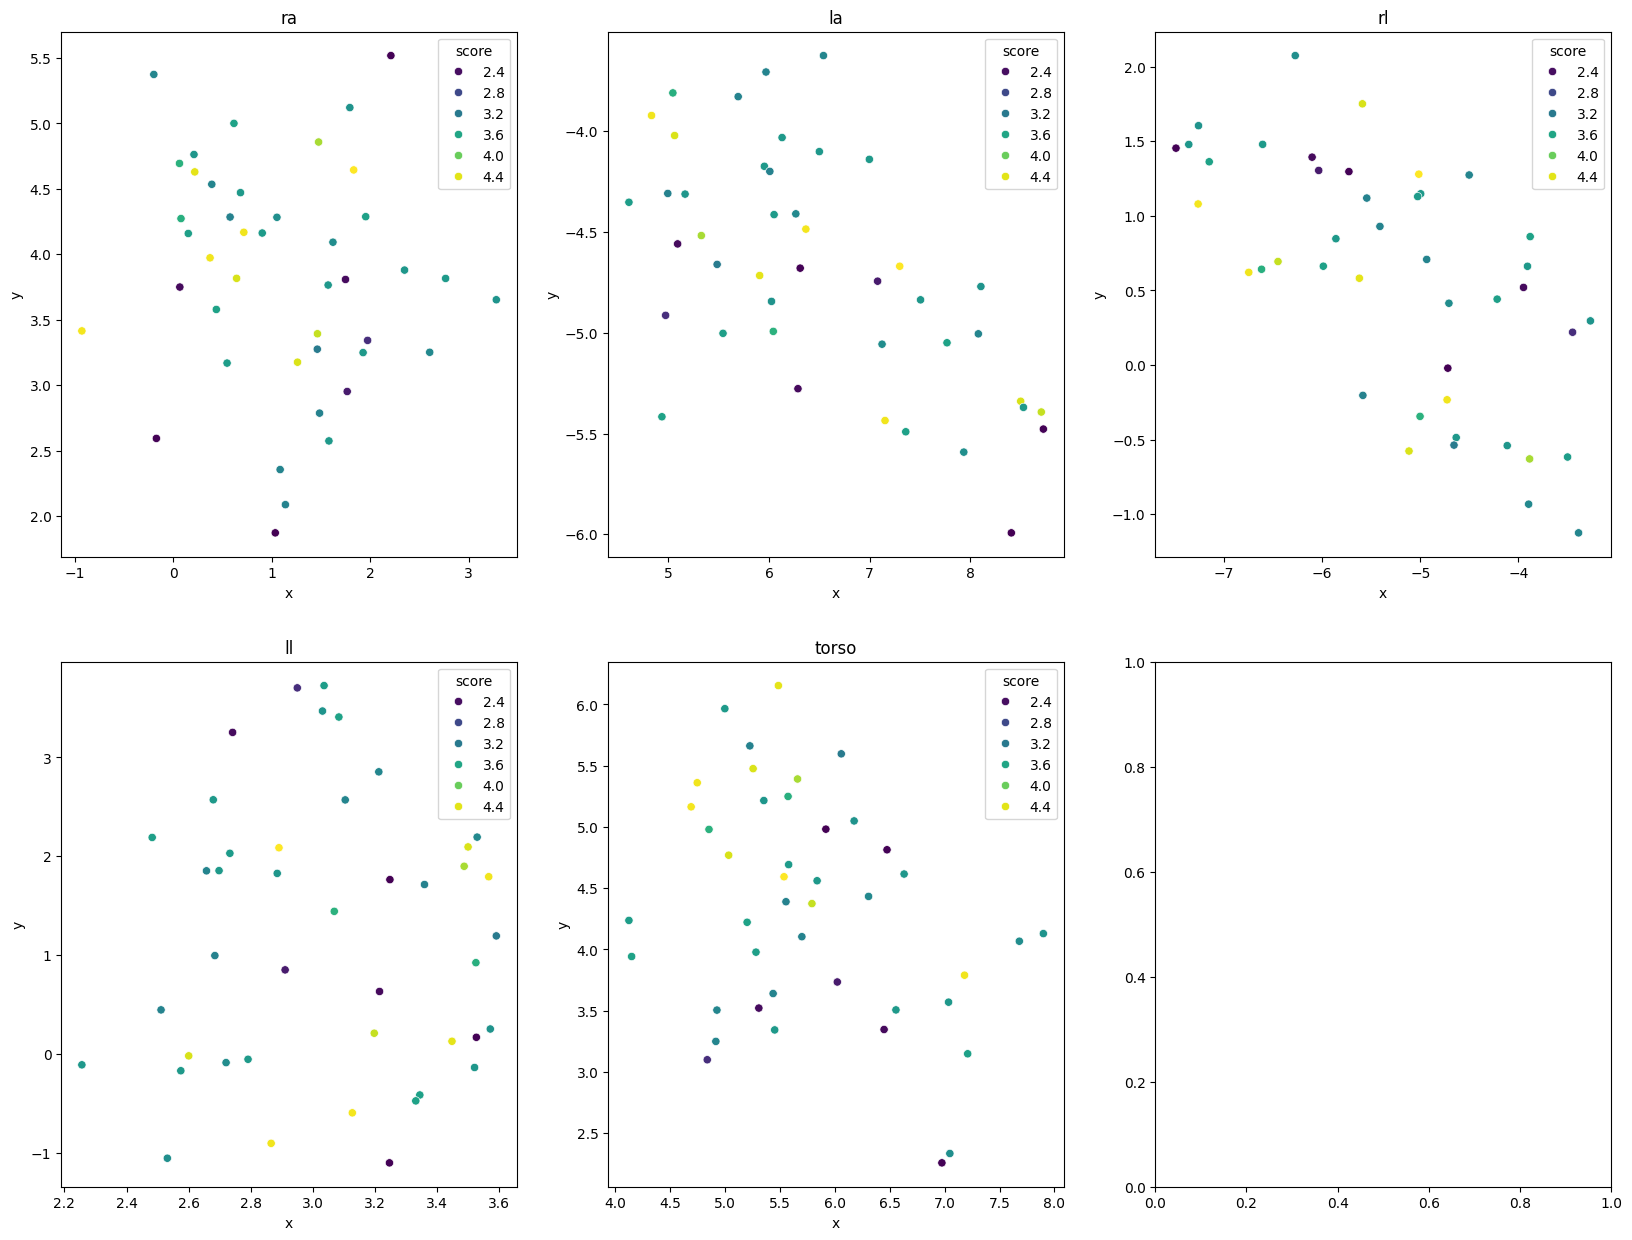

Window size: 20


100%|██████████| 43/43 [00:04<00:00,  9.58it/s]


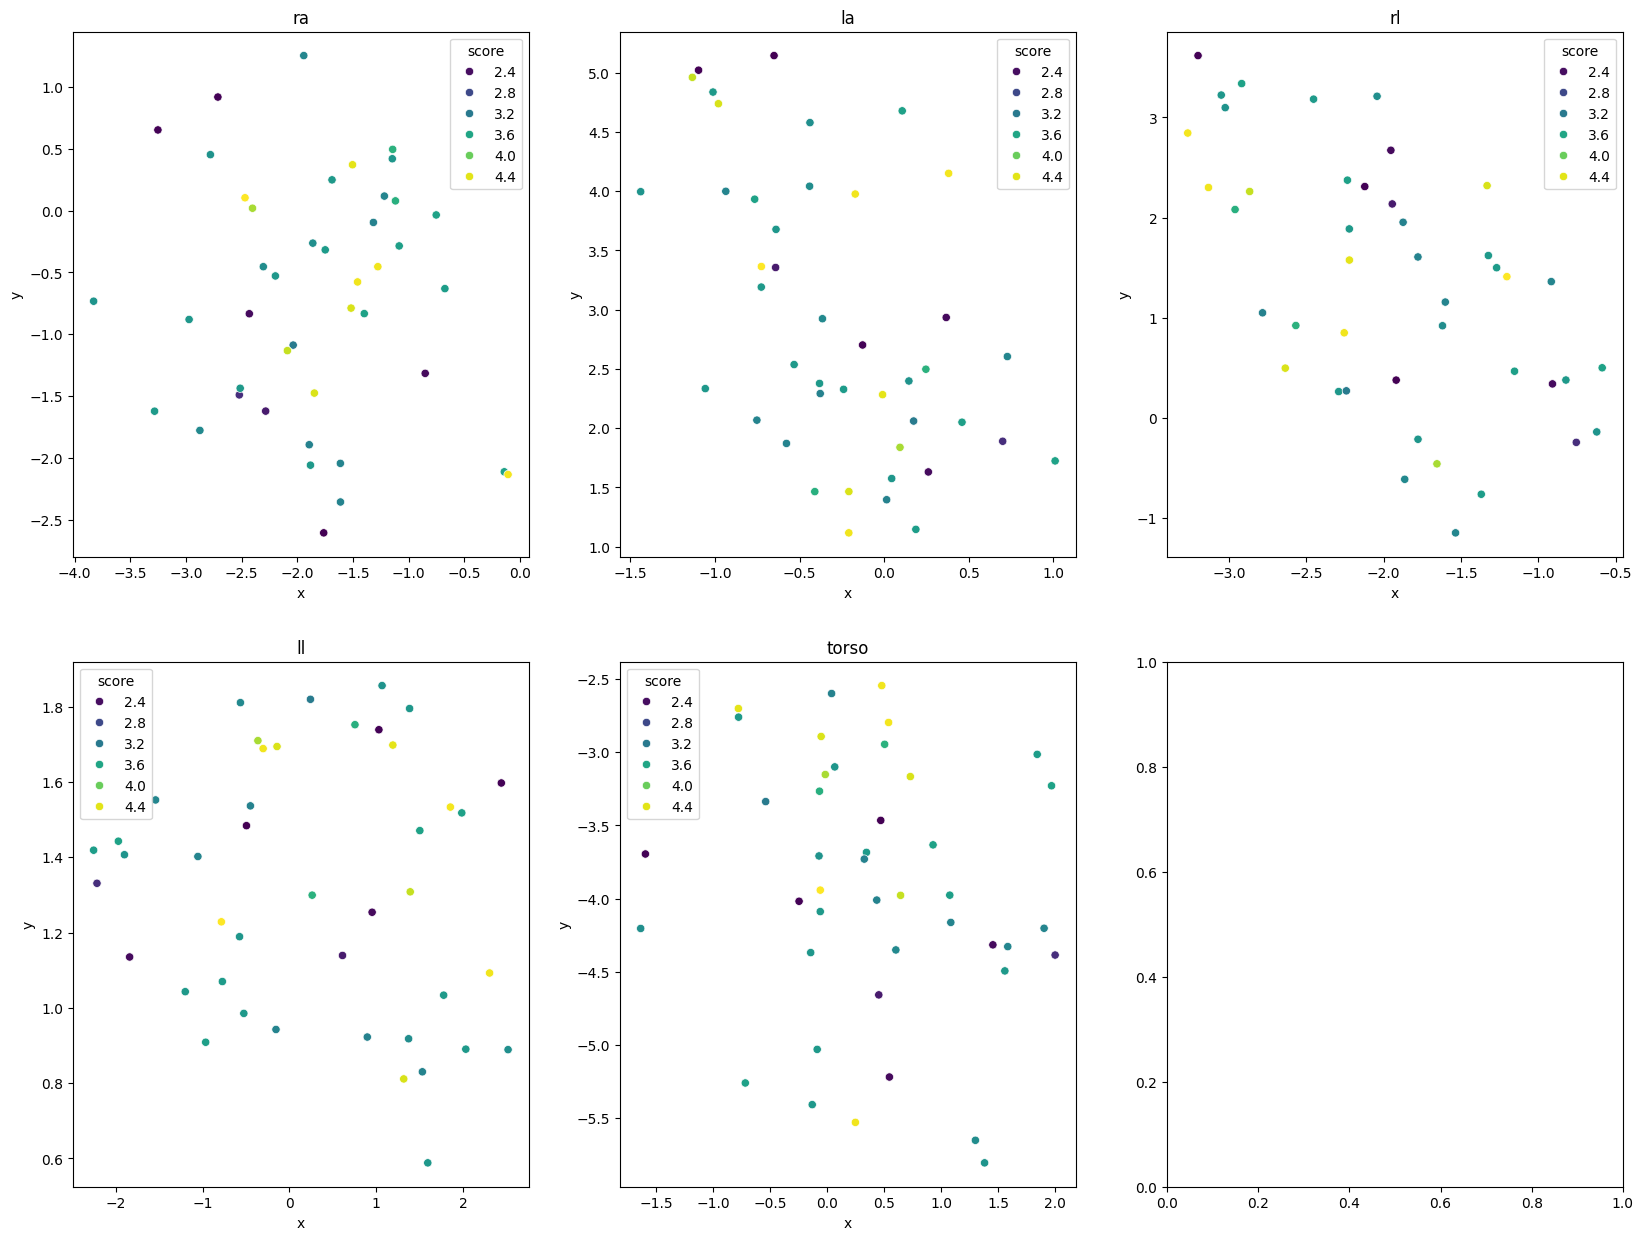

Window size: 25


100%|██████████| 43/43 [00:04<00:00, 10.27it/s]


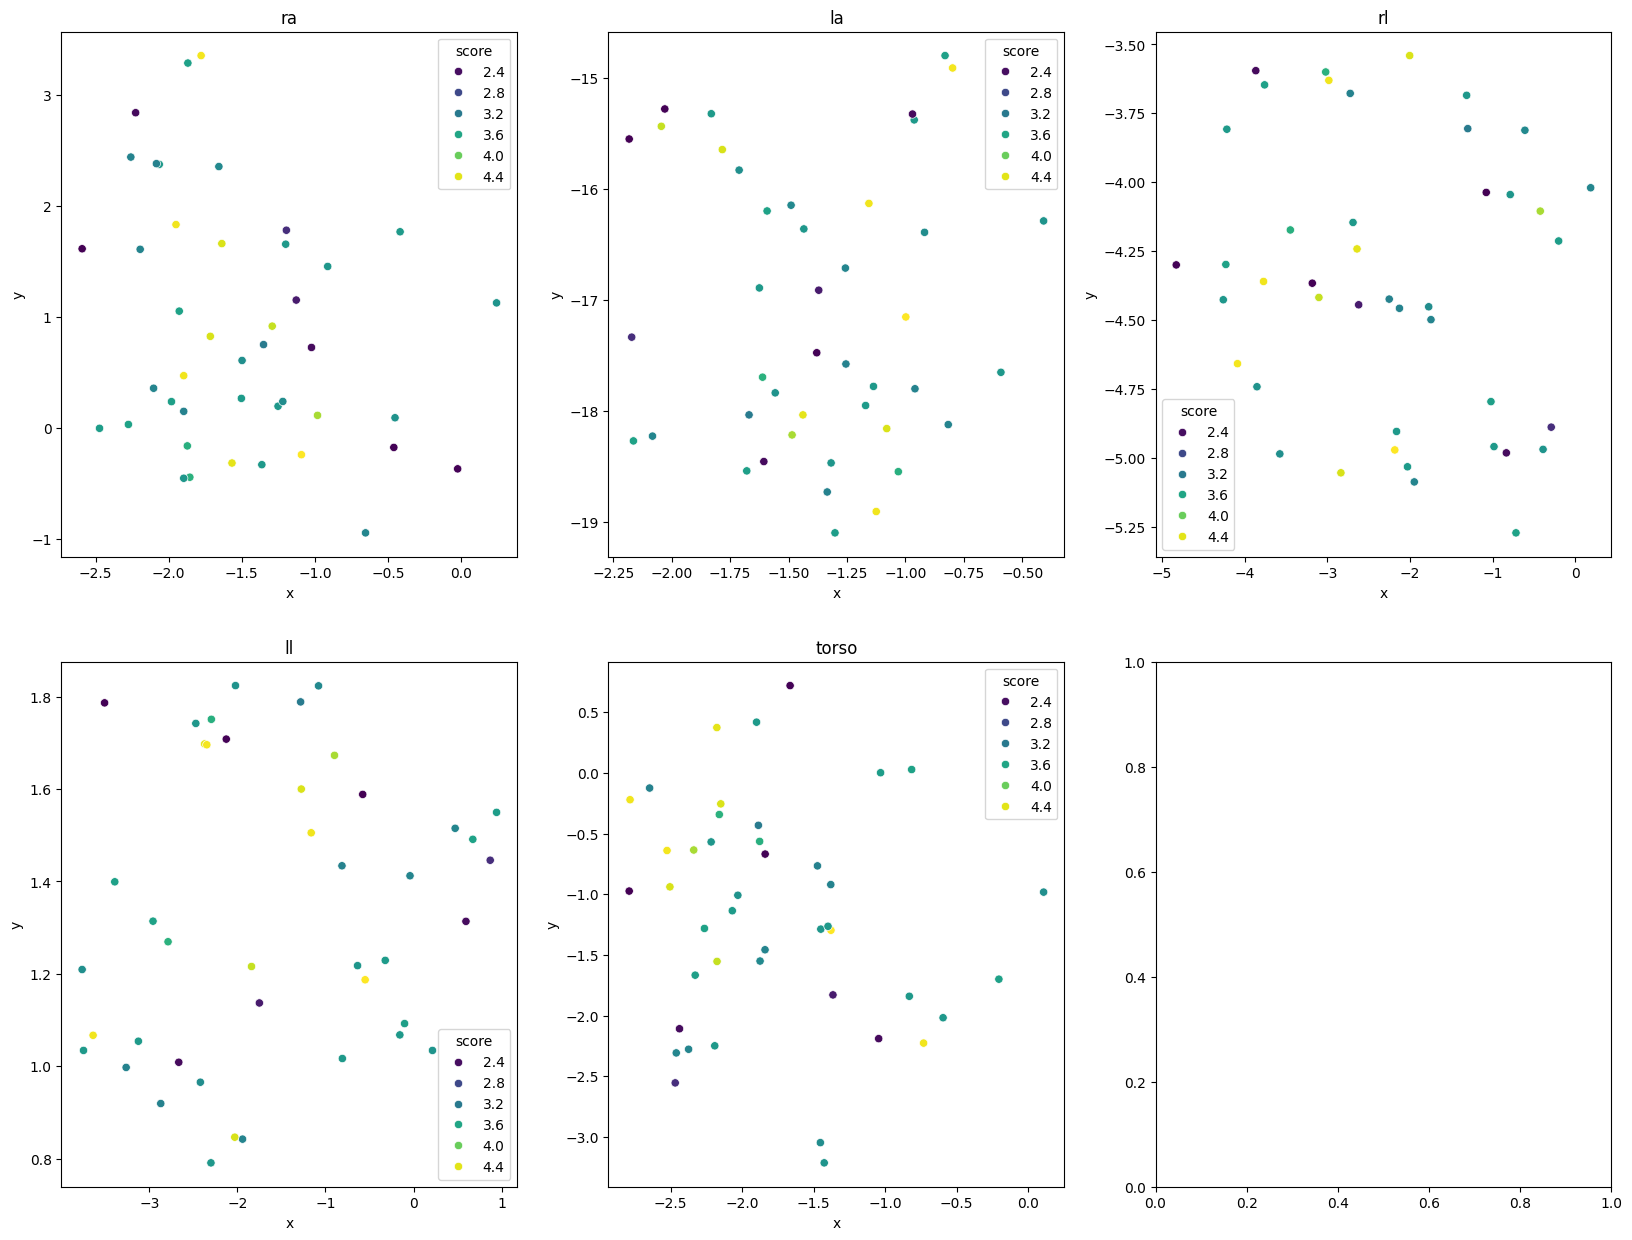

Window size: 30


100%|██████████| 43/43 [00:04<00:00,  9.97it/s]


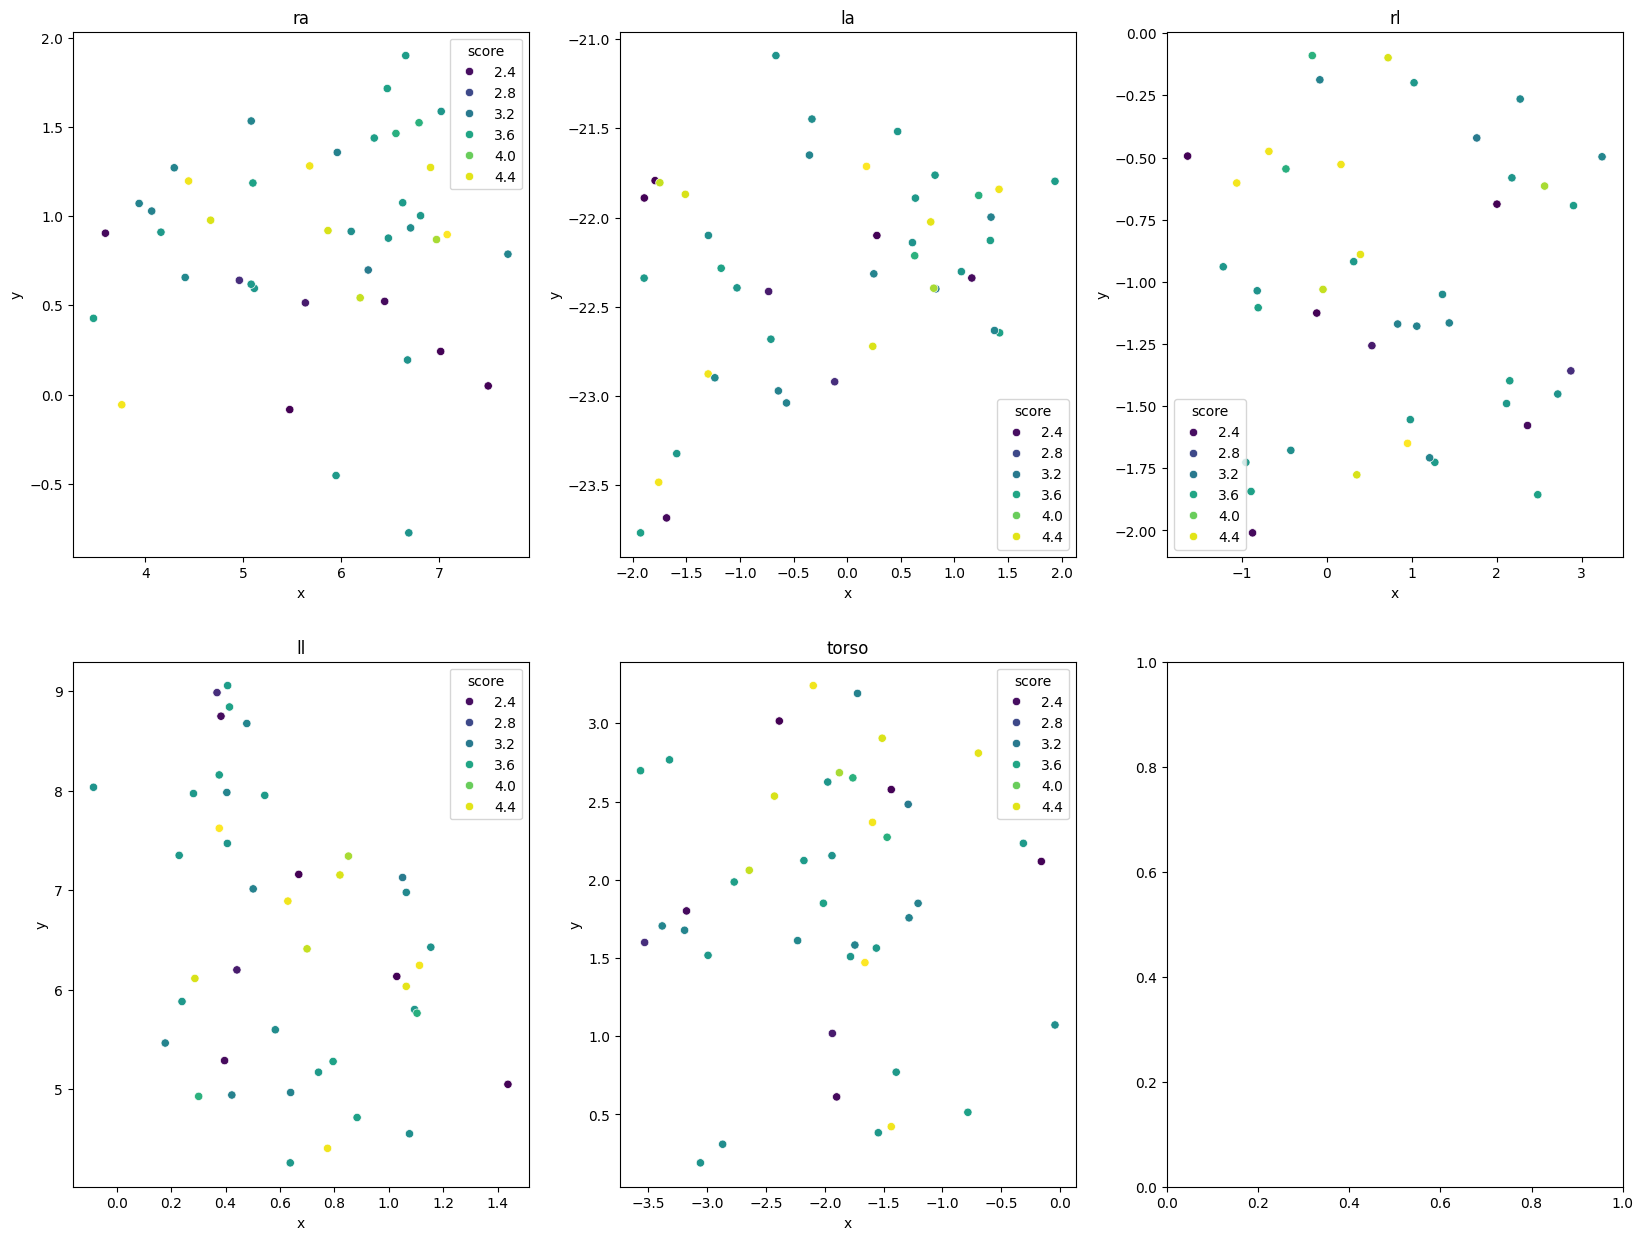

Window size: 35


100%|██████████| 43/43 [00:04<00:00,  9.95it/s]


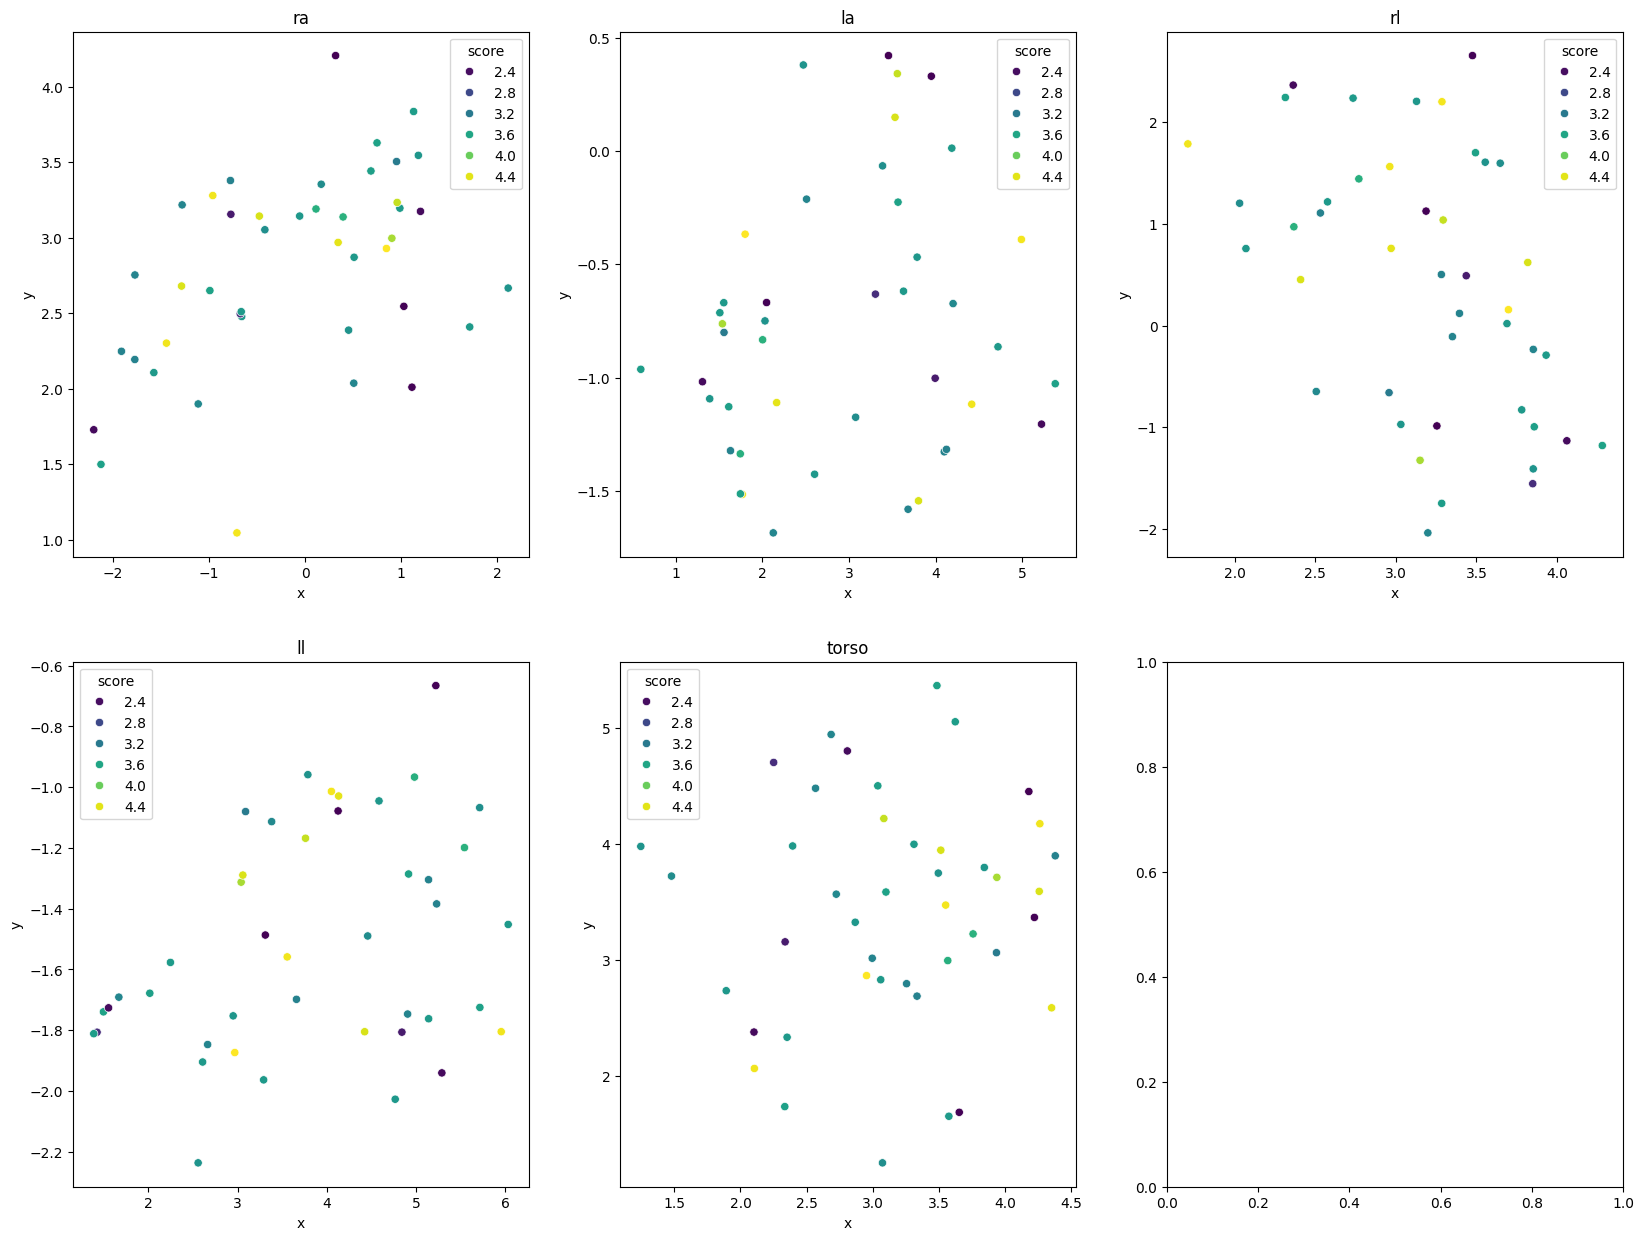

Window size: 40


100%|██████████| 43/43 [00:04<00:00,  9.93it/s]


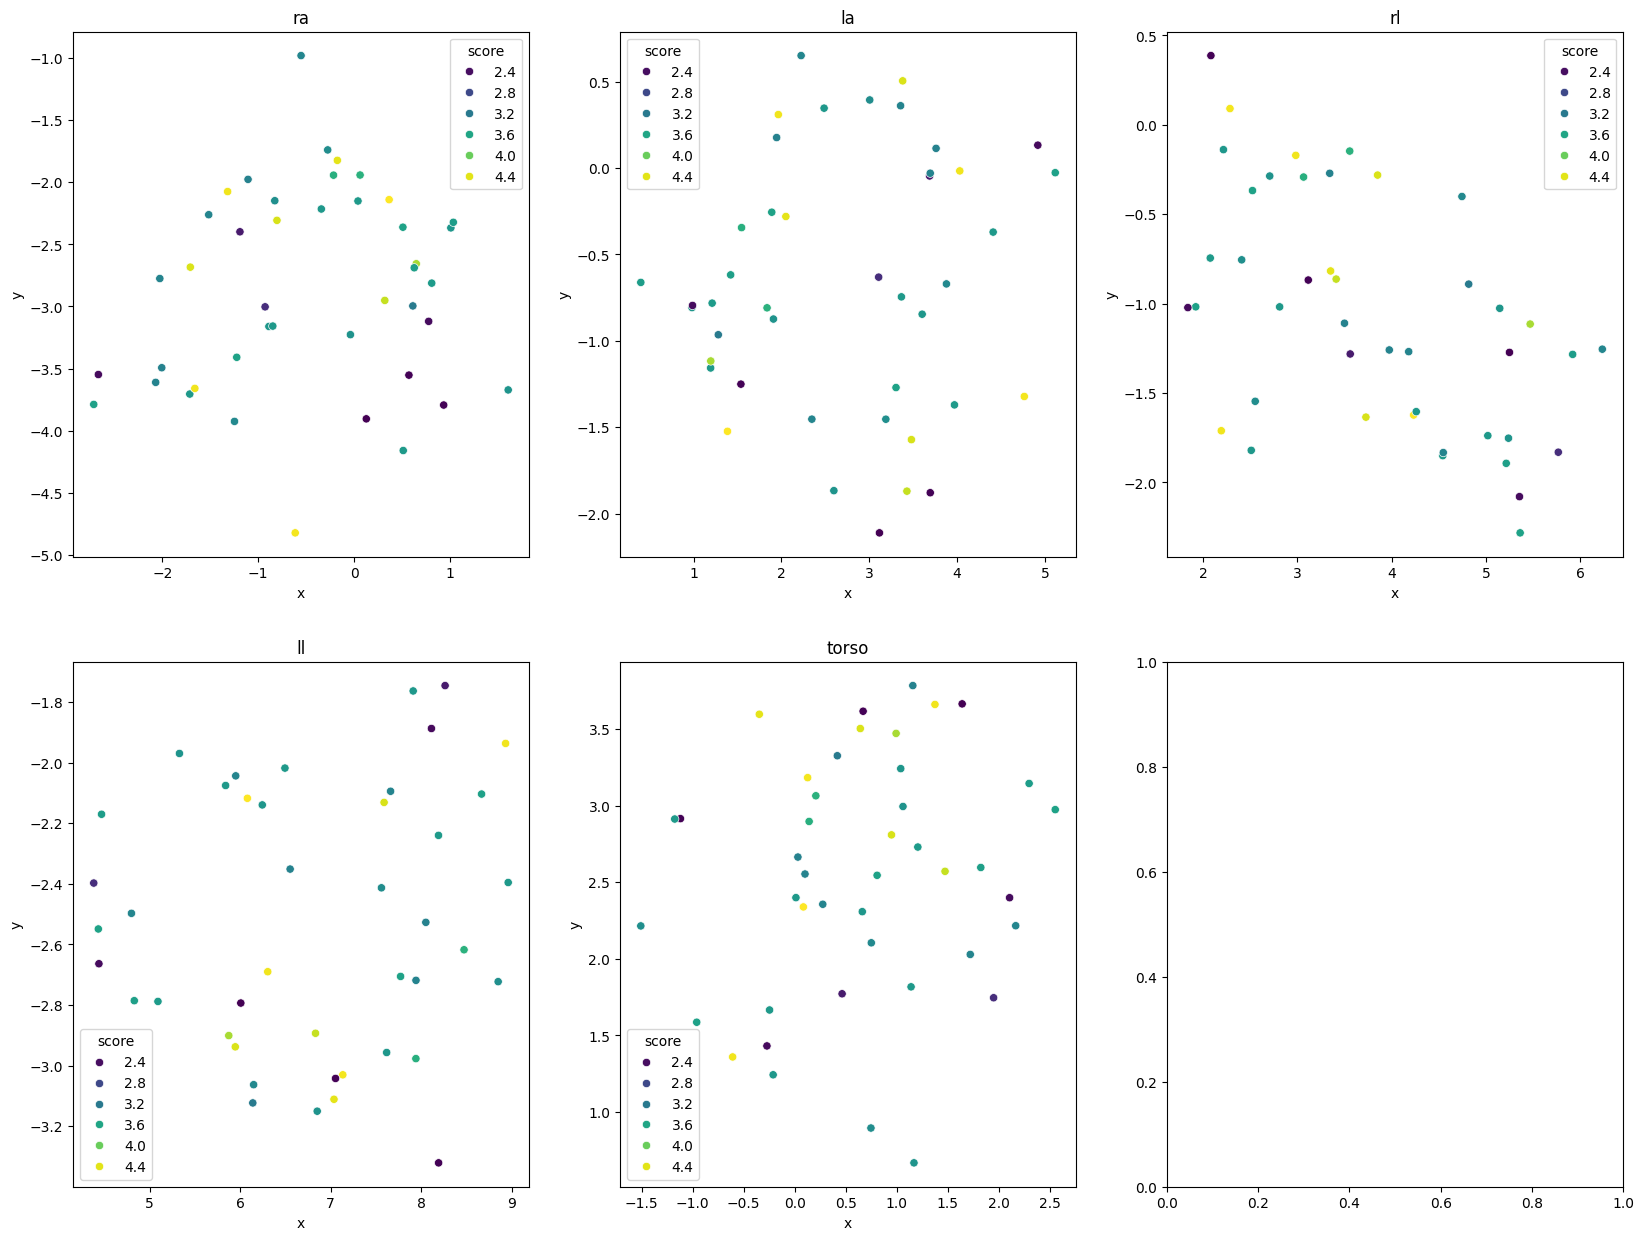

Window size: 45


100%|██████████| 43/43 [00:04<00:00, 10.08it/s]


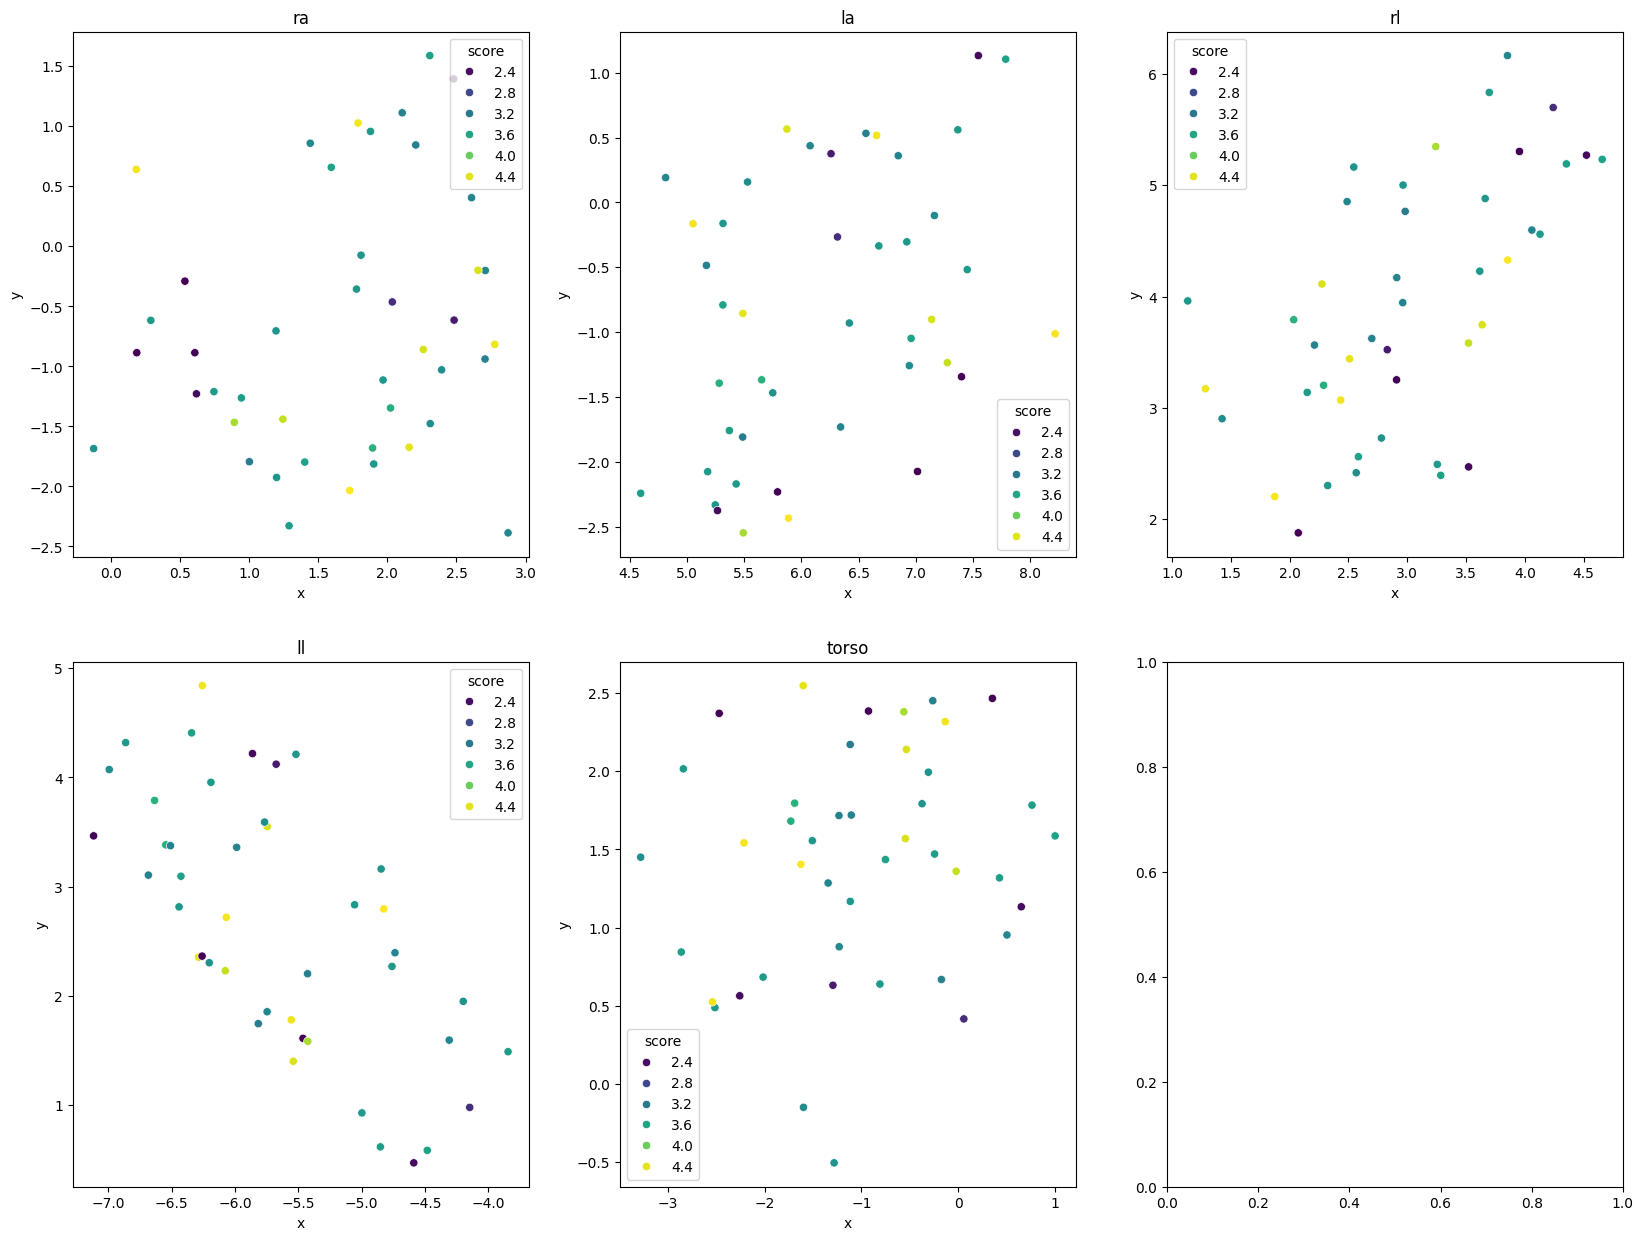

Window size: 50


100%|██████████| 43/43 [00:04<00:00,  9.87it/s]


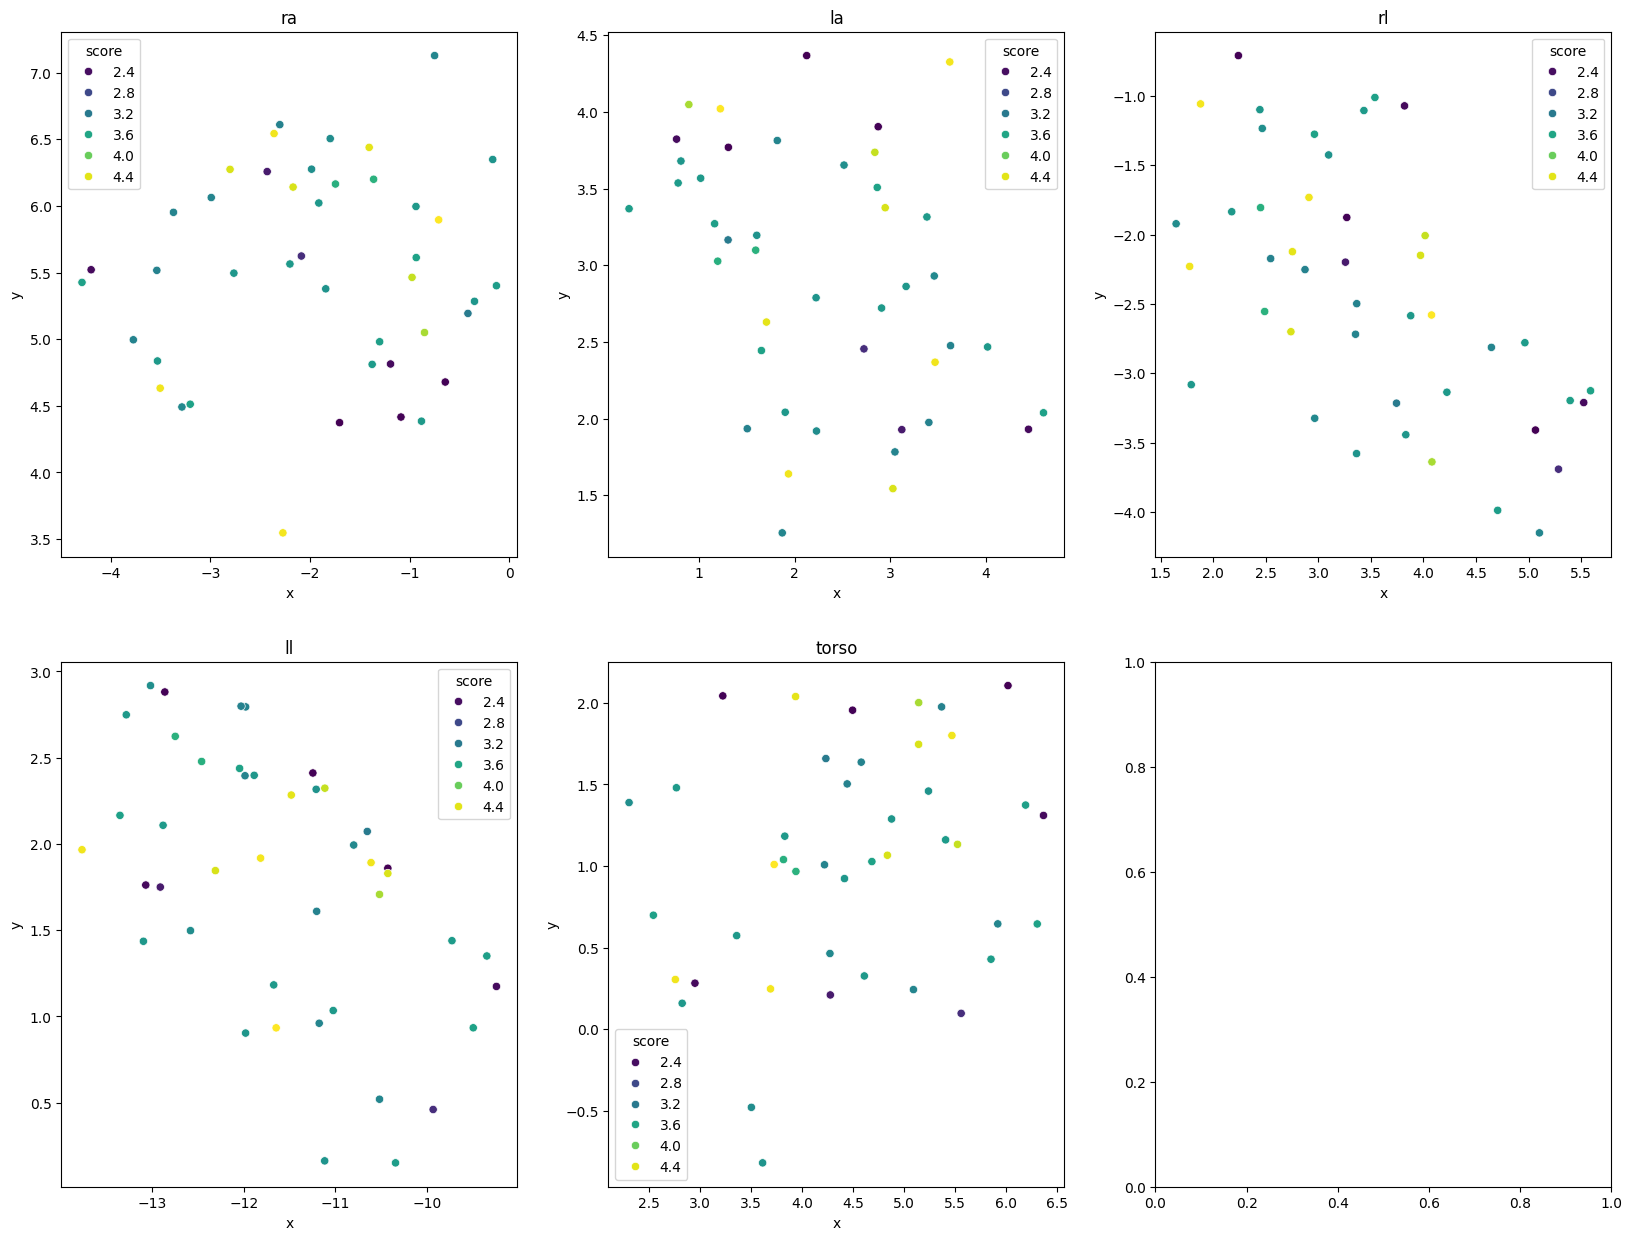

Window size: 55


100%|██████████| 43/43 [00:04<00:00,  9.83it/s]


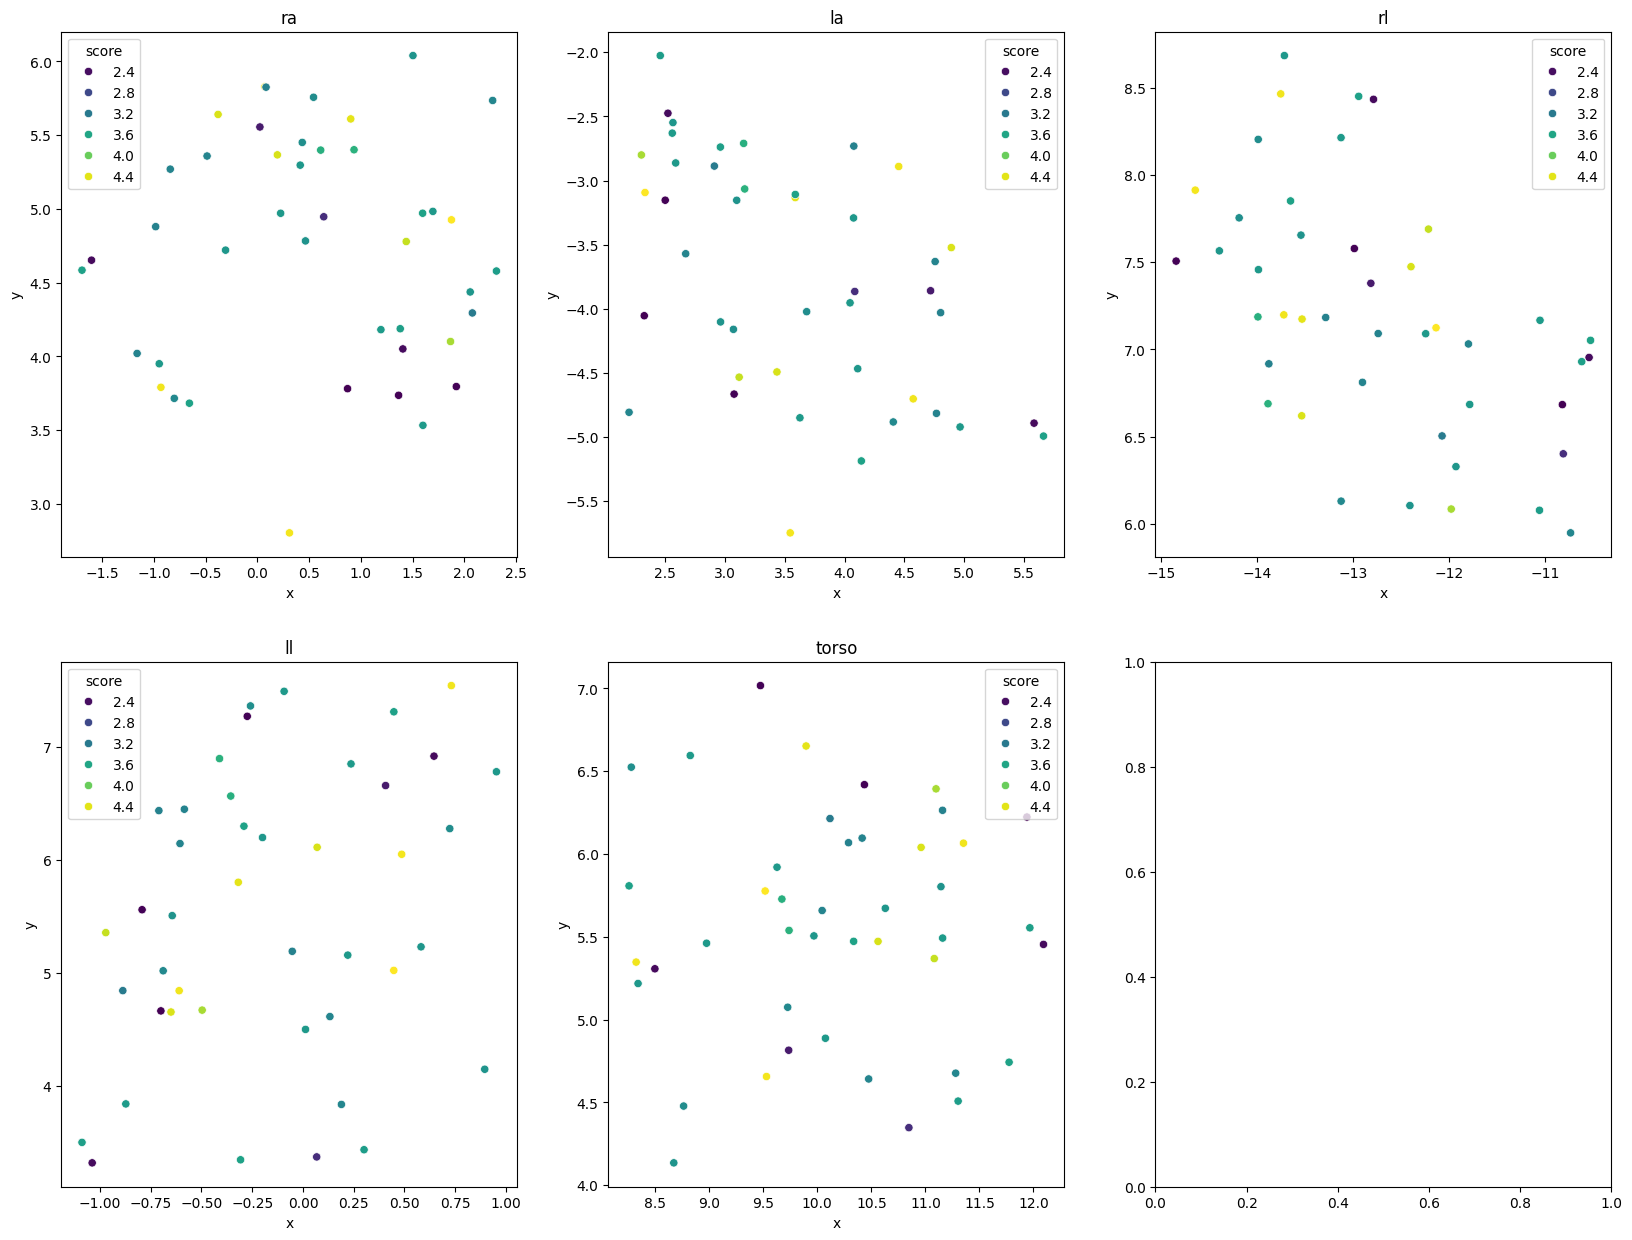

Window size: 60


100%|██████████| 43/43 [00:04<00:00,  9.90it/s]


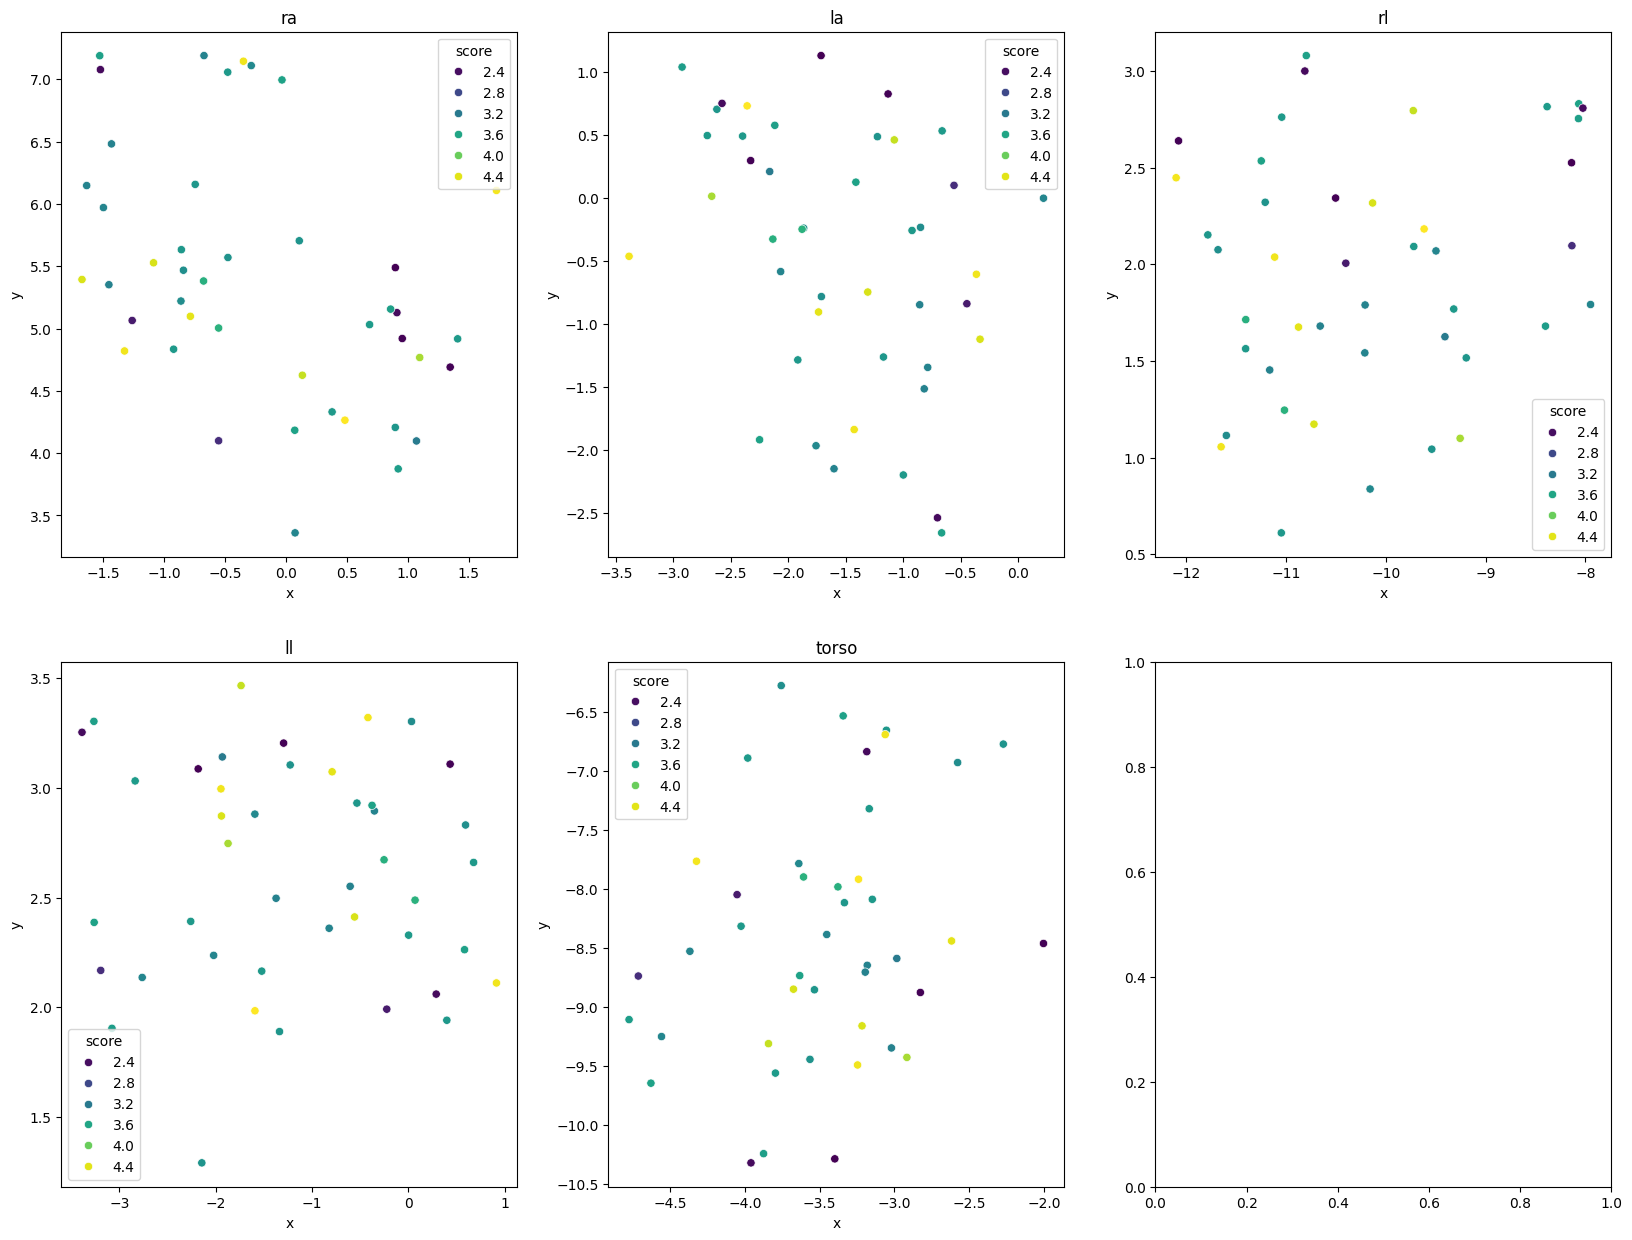

Window size: 65


100%|██████████| 43/43 [00:04<00:00,  9.94it/s]


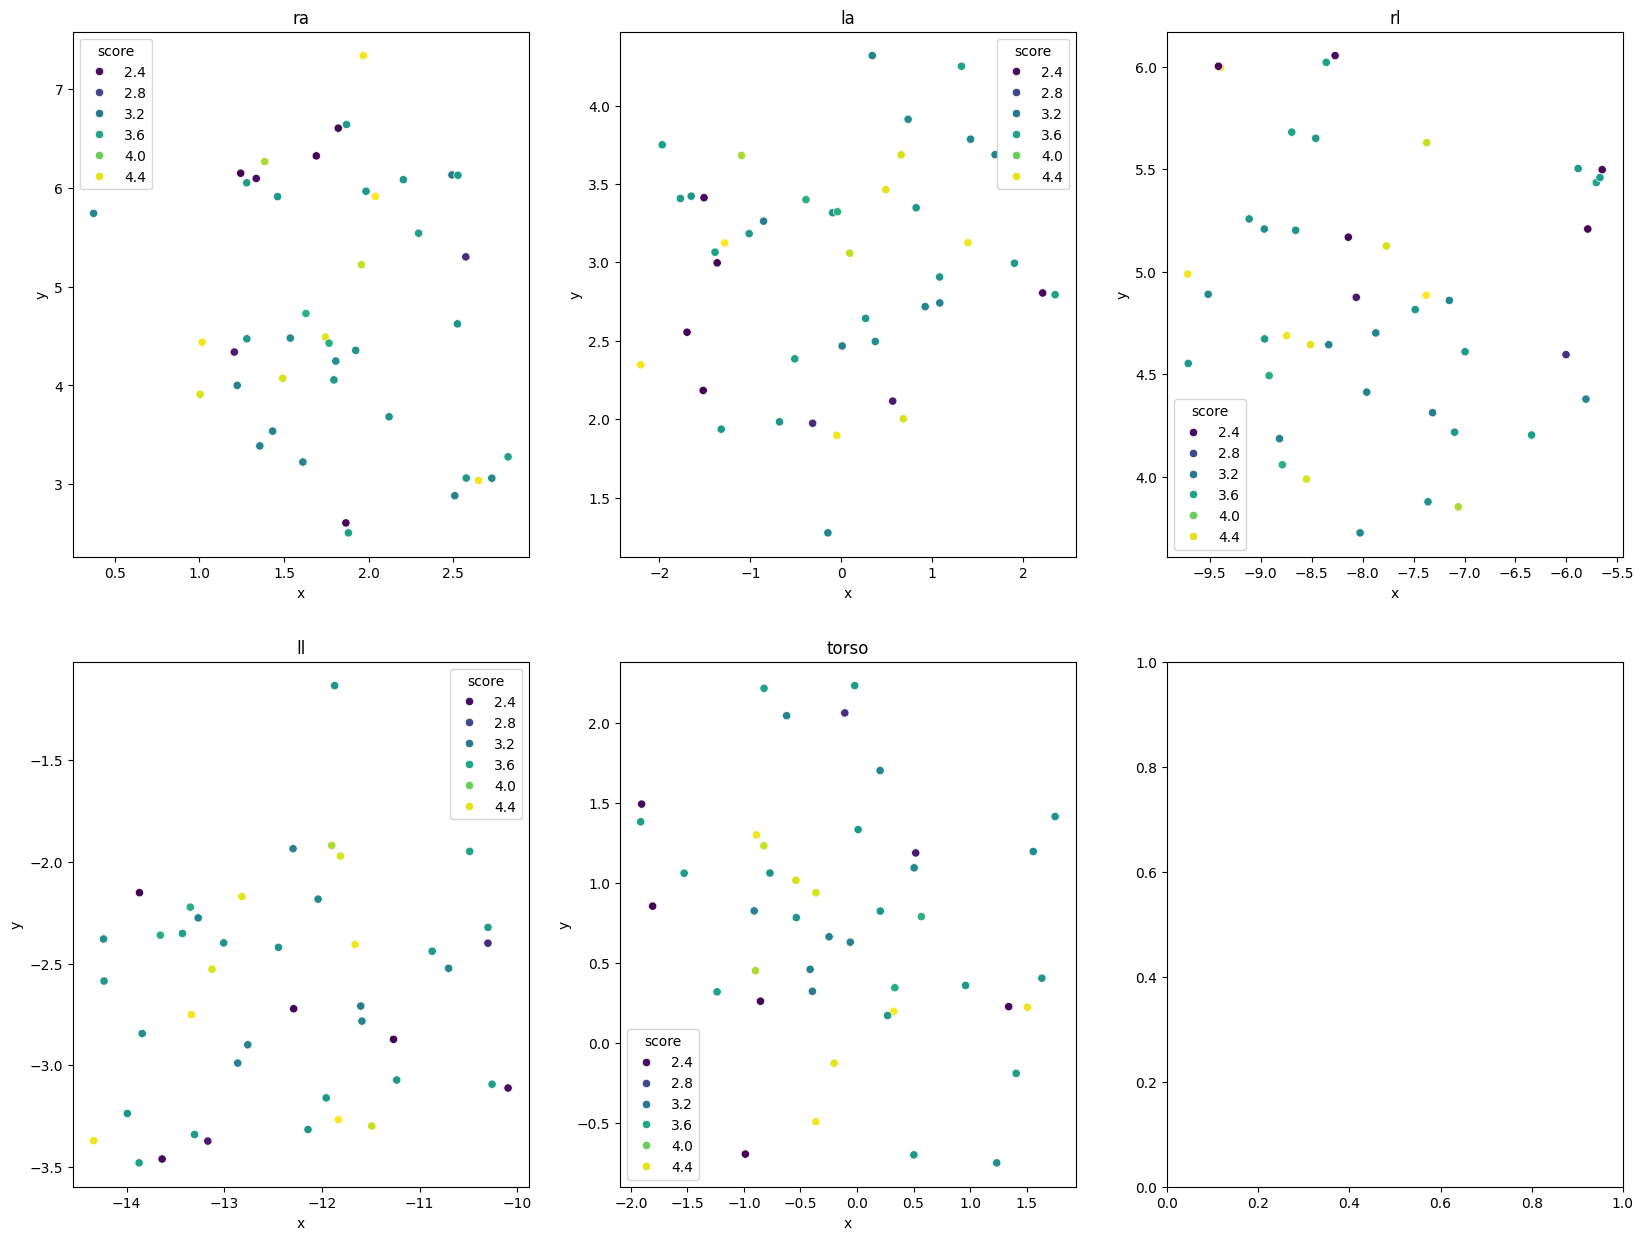

Window size: 70


100%|██████████| 43/43 [00:04<00:00, 10.30it/s]


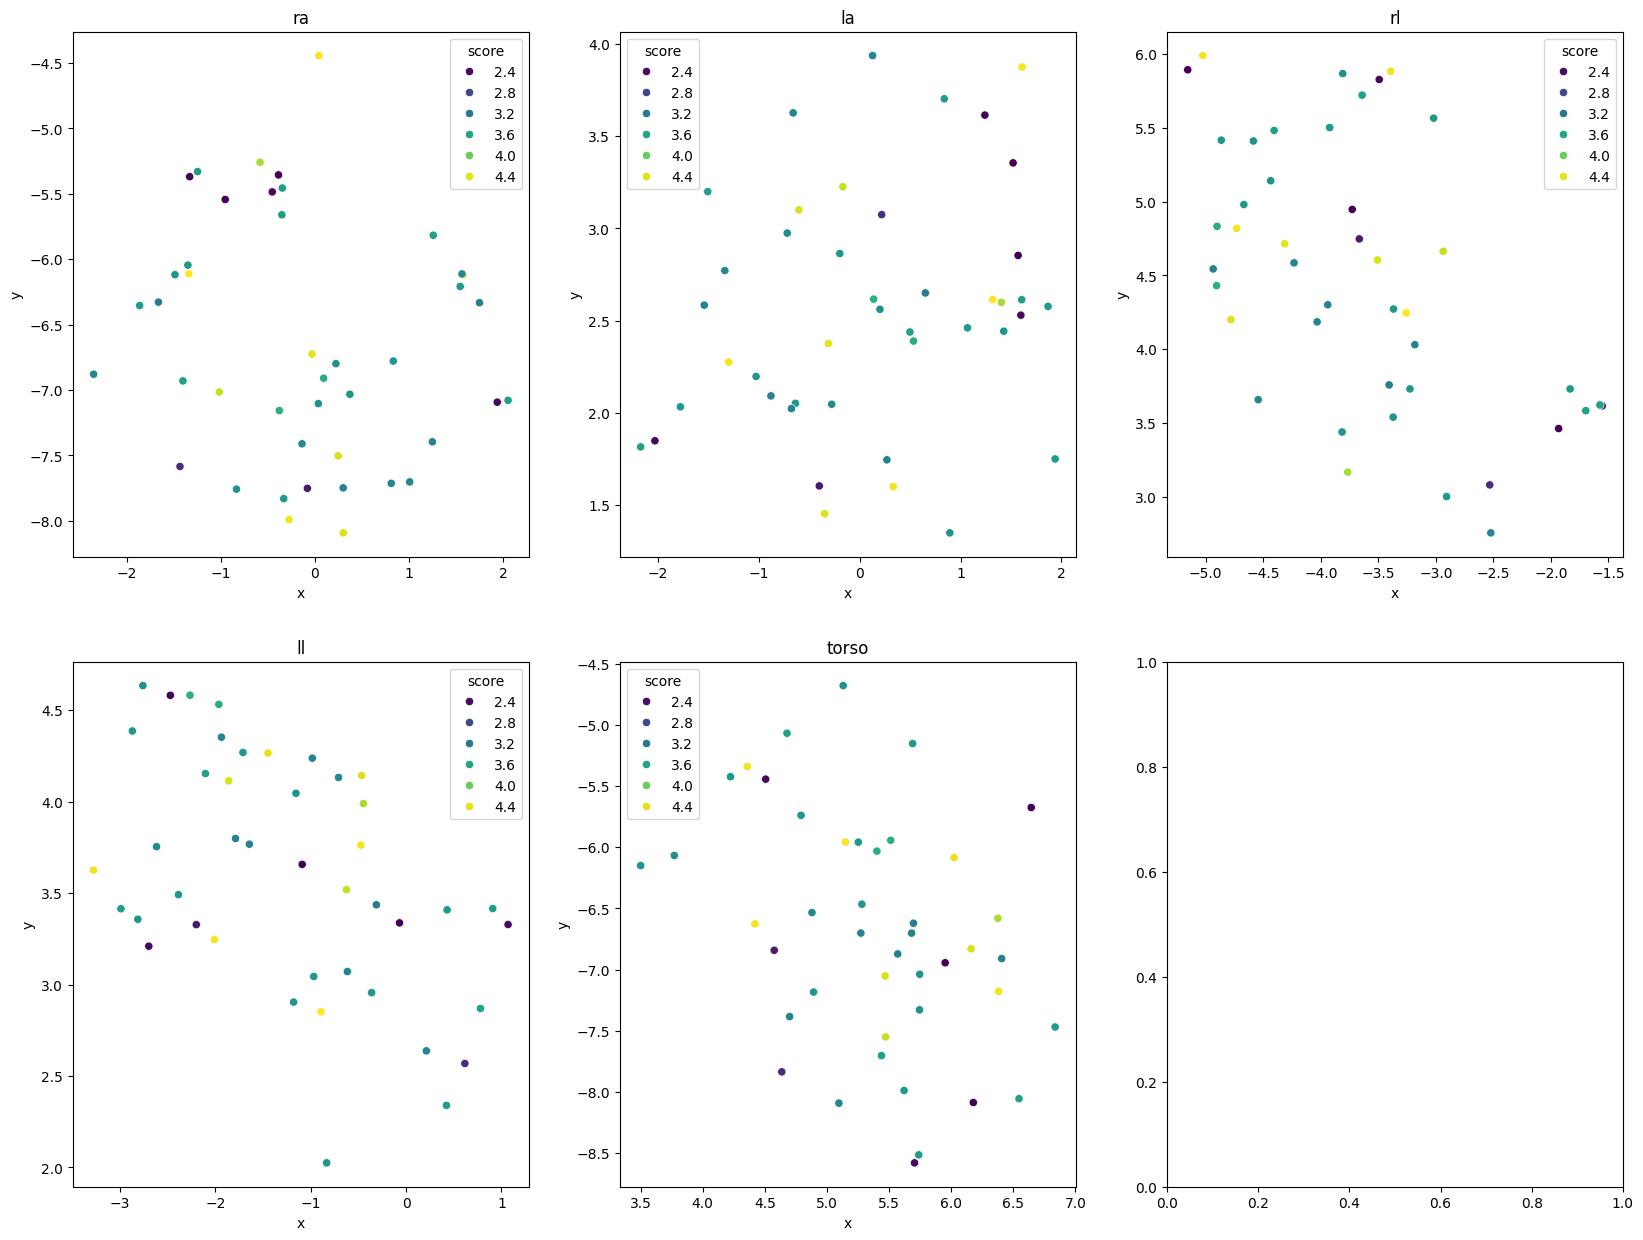

Window size: 75


100%|██████████| 43/43 [00:04<00:00, 10.00it/s]


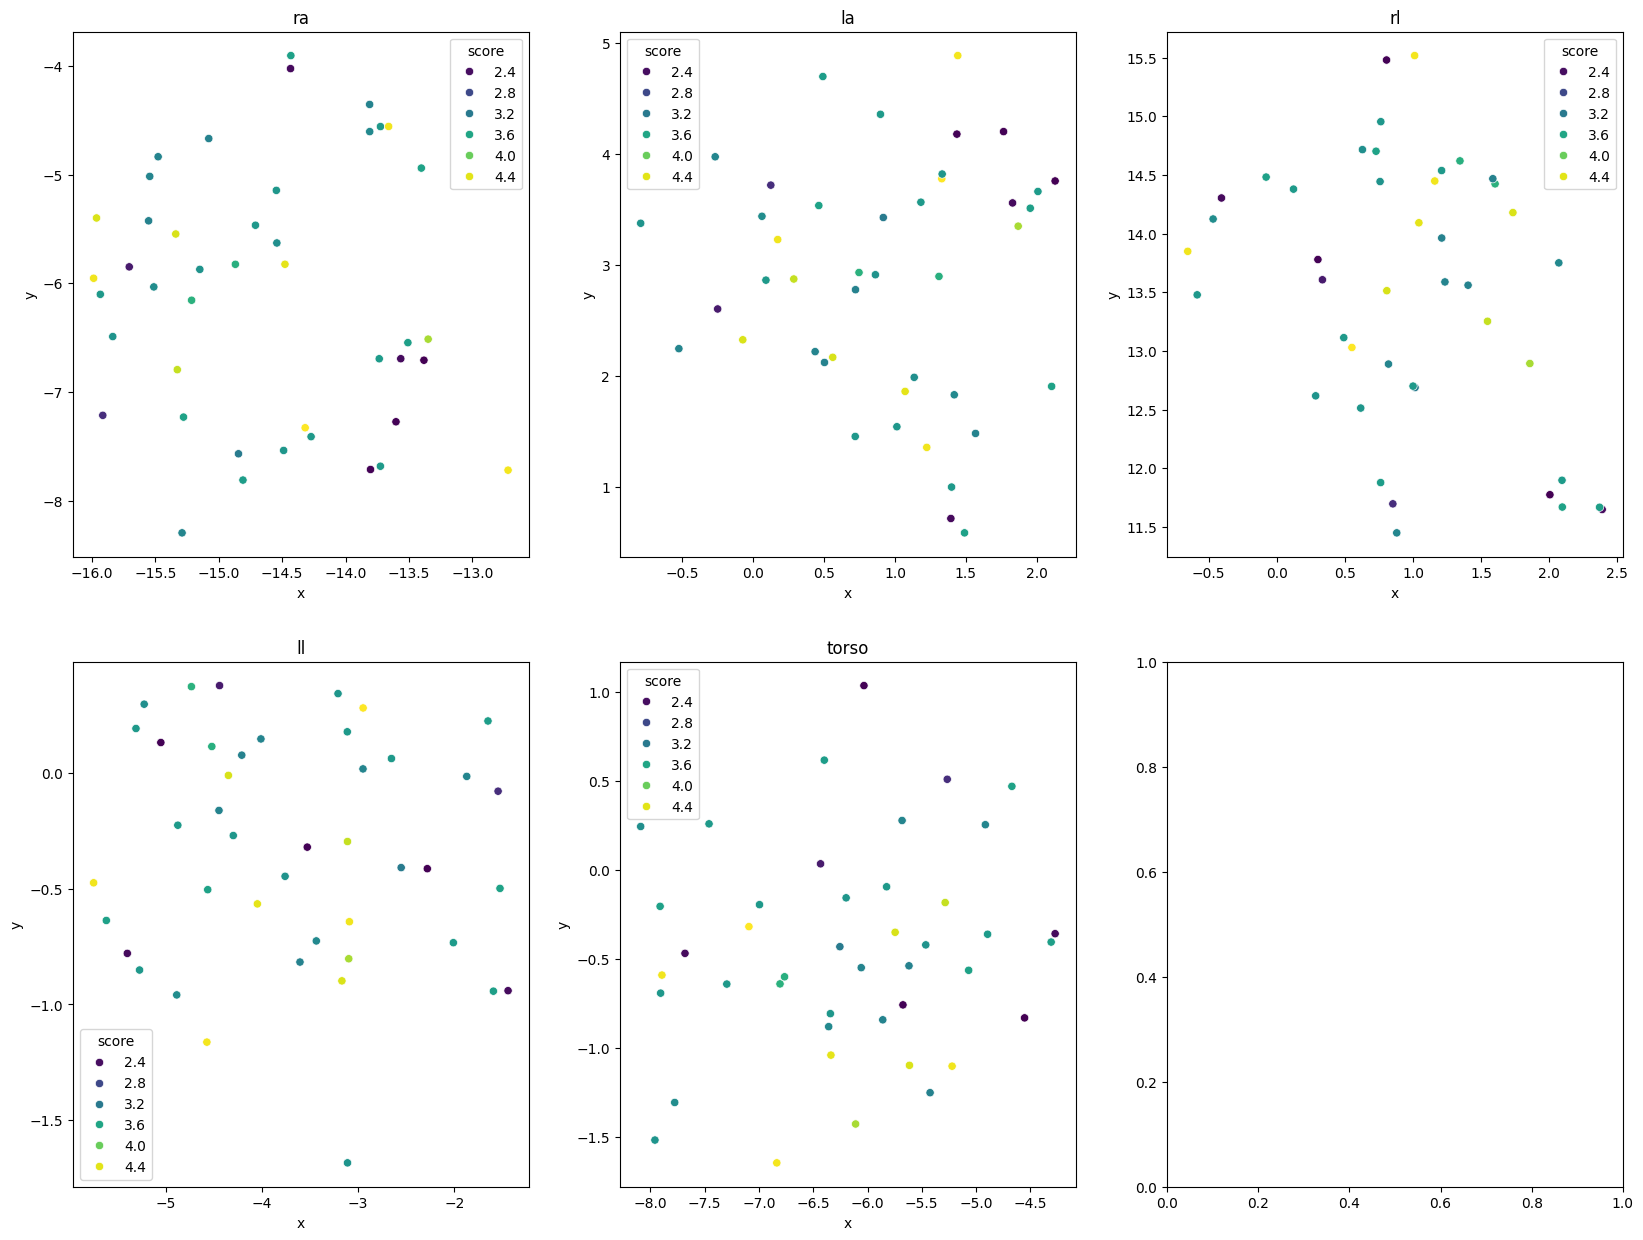

Window size: 80


100%|██████████| 43/43 [00:04<00:00,  9.82it/s]


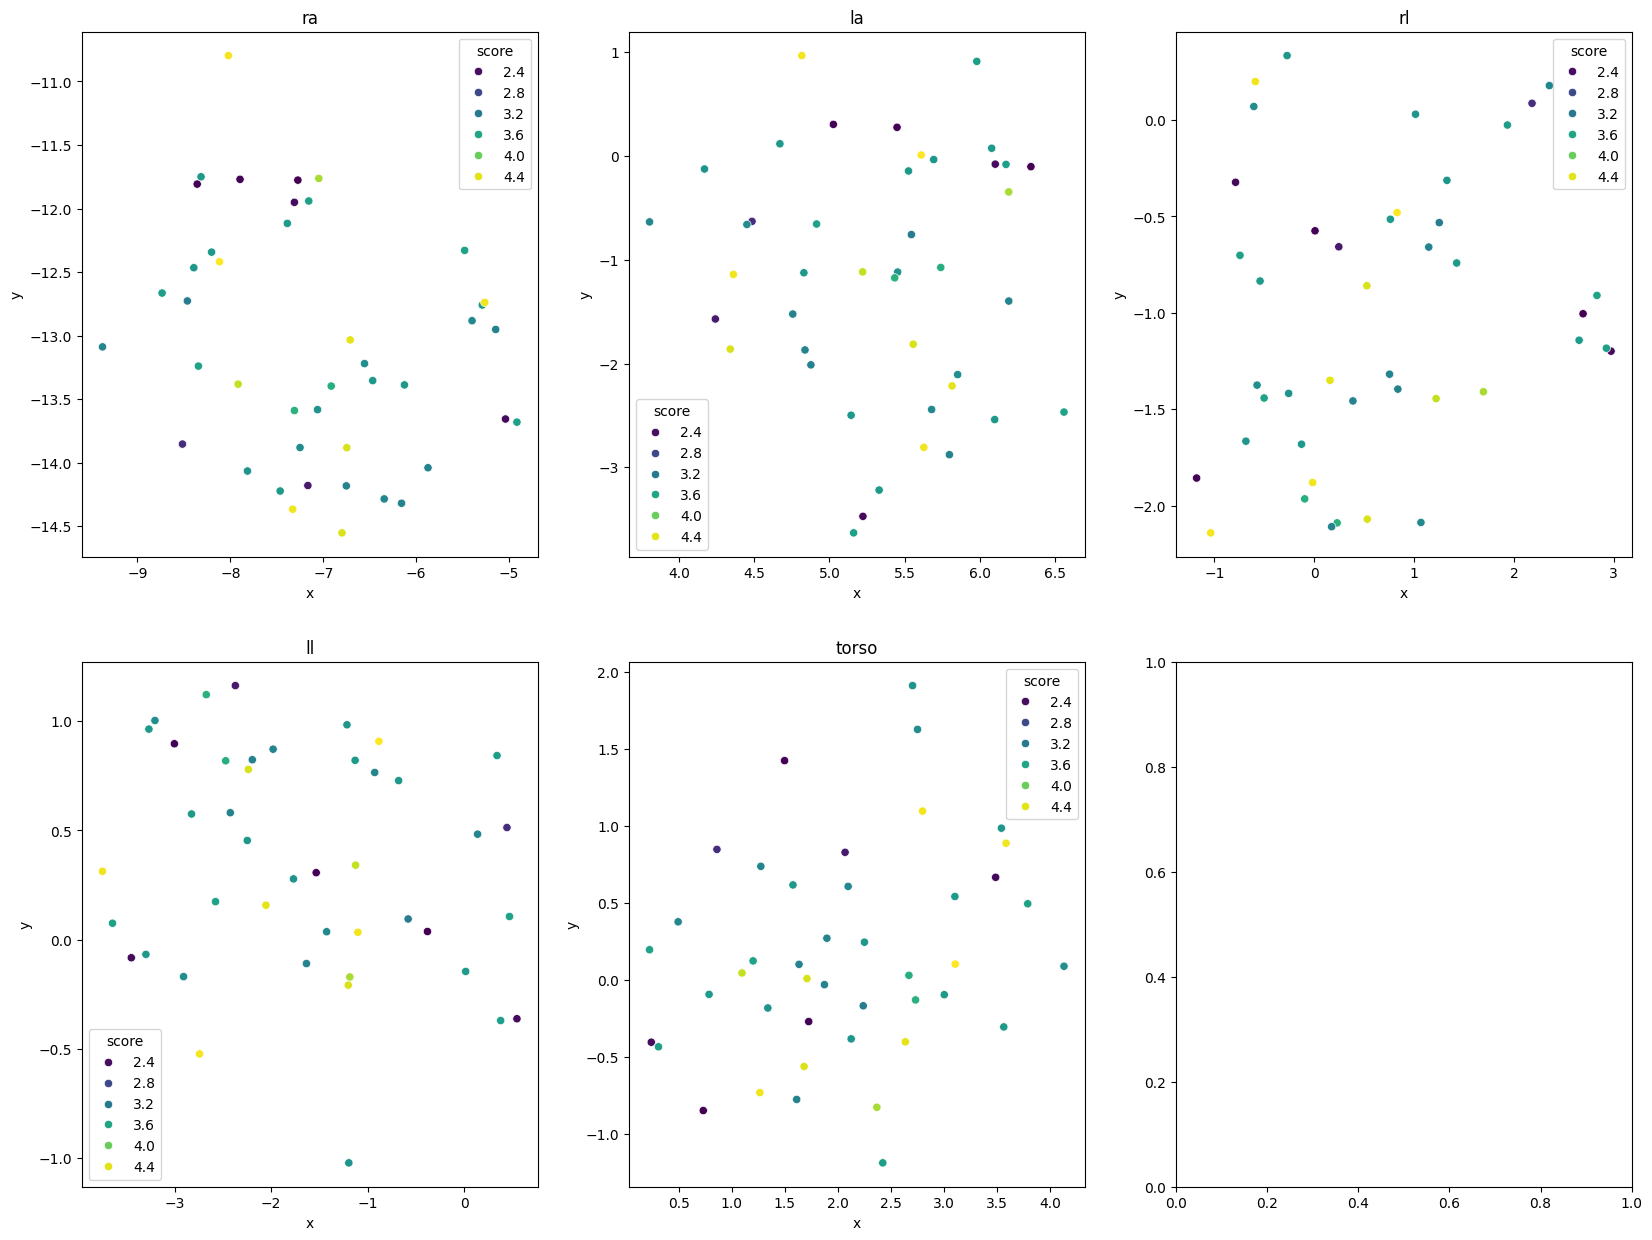

Window size: 85


100%|██████████| 43/43 [00:04<00:00,  9.93it/s]


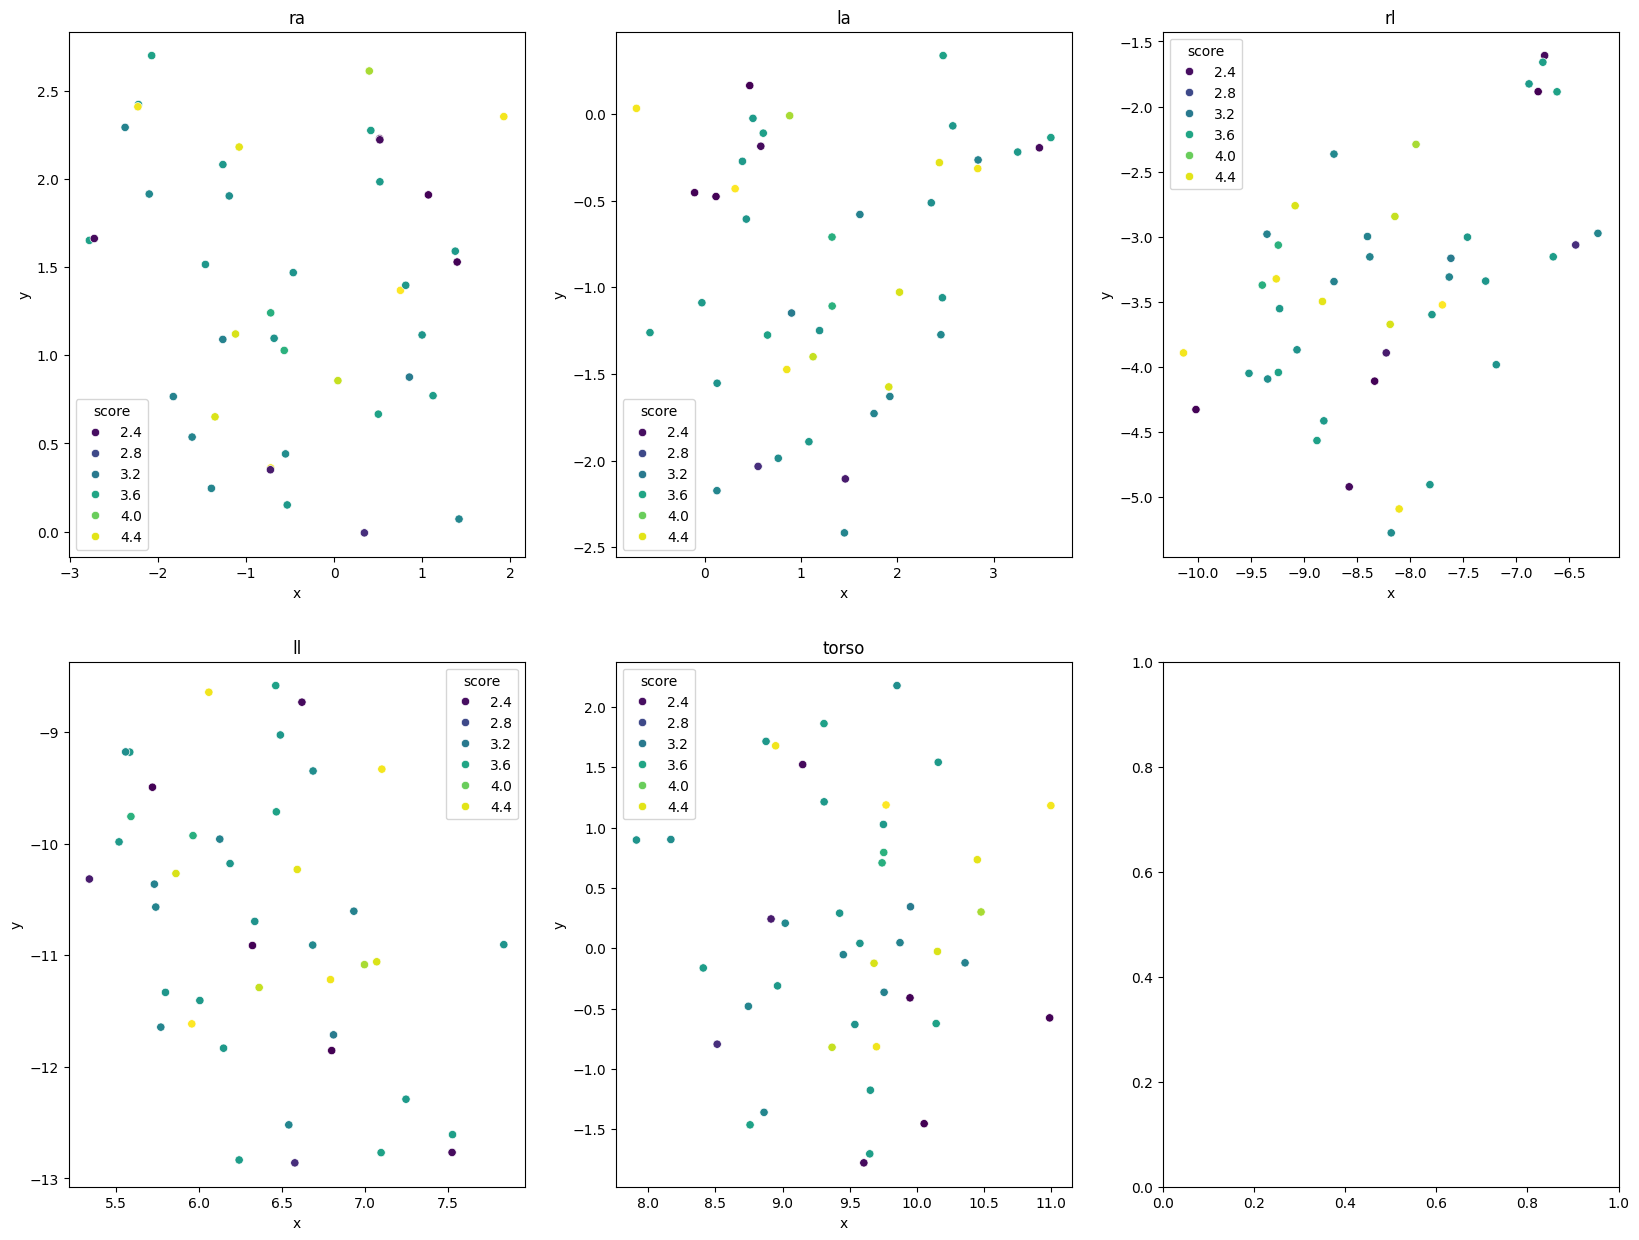

Window size: 90


100%|██████████| 43/43 [00:04<00:00,  9.69it/s]


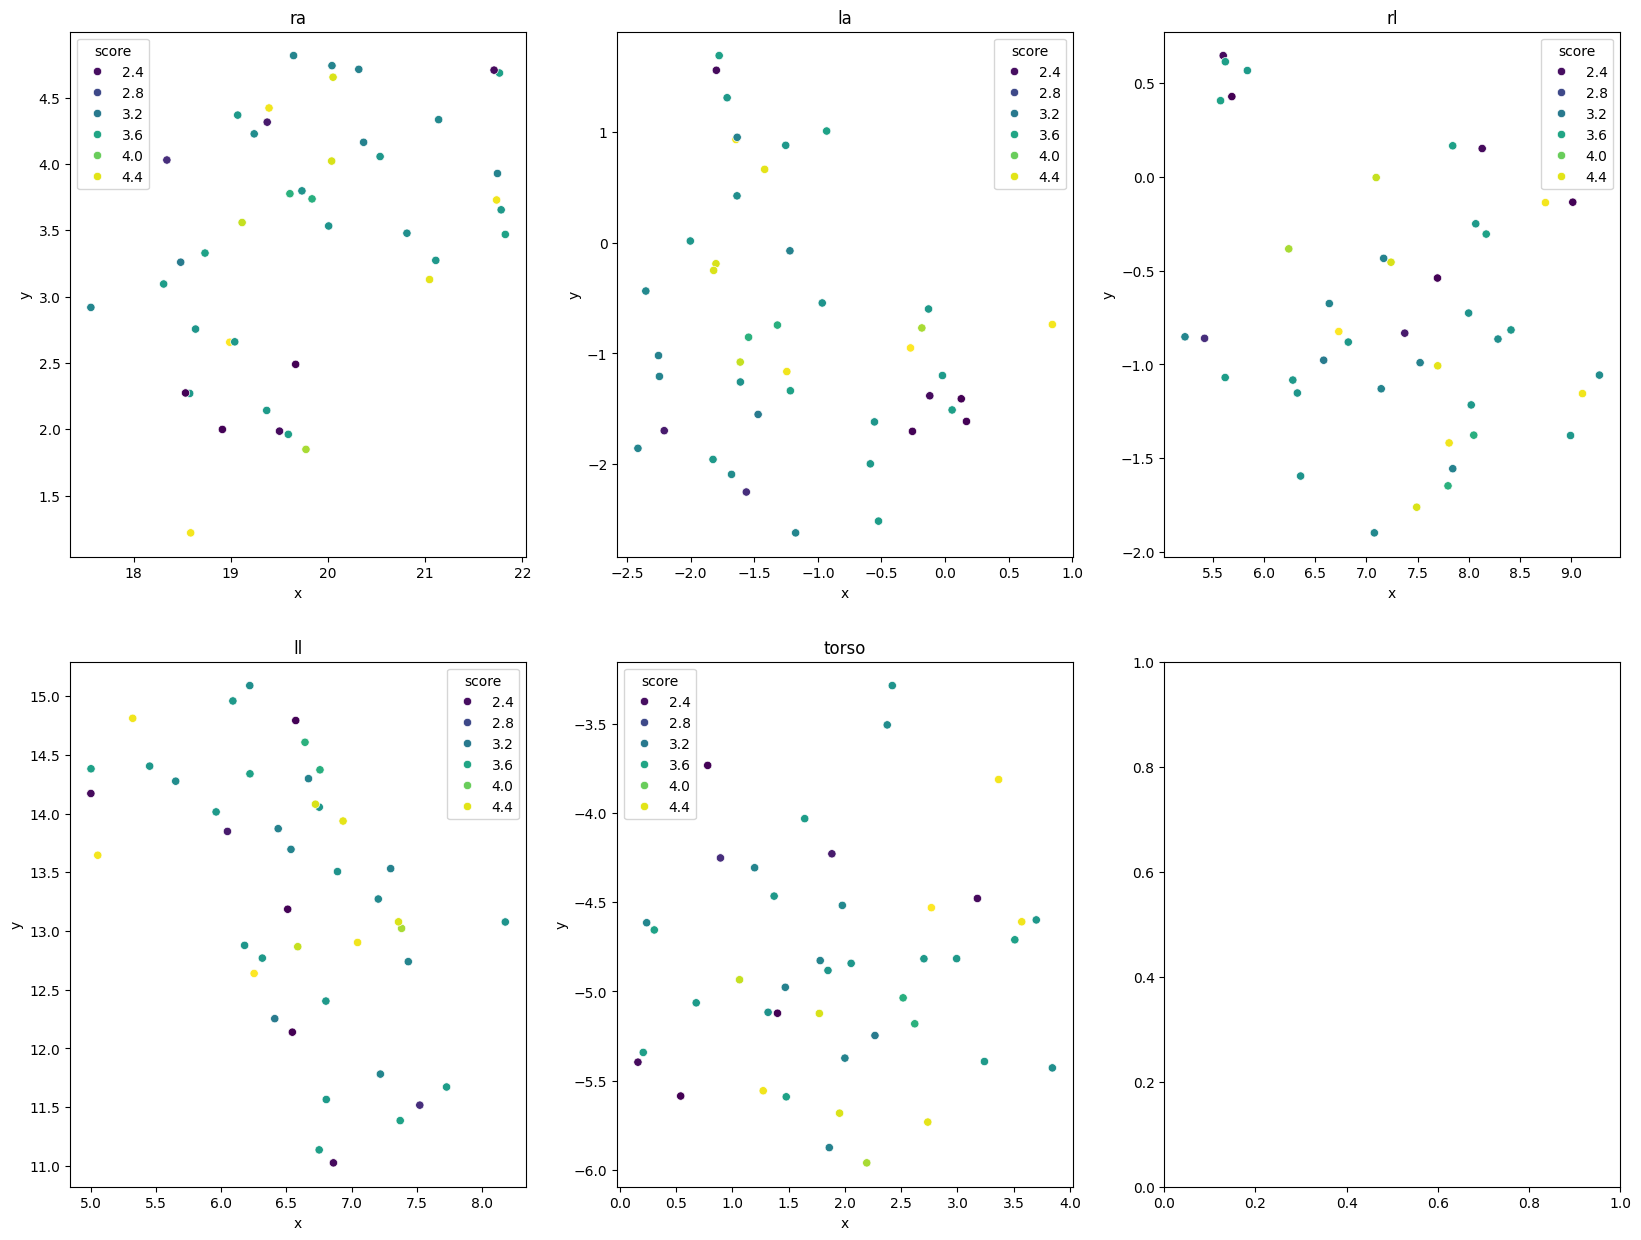

Window size: 95


100%|██████████| 43/43 [00:04<00:00,  9.89it/s]


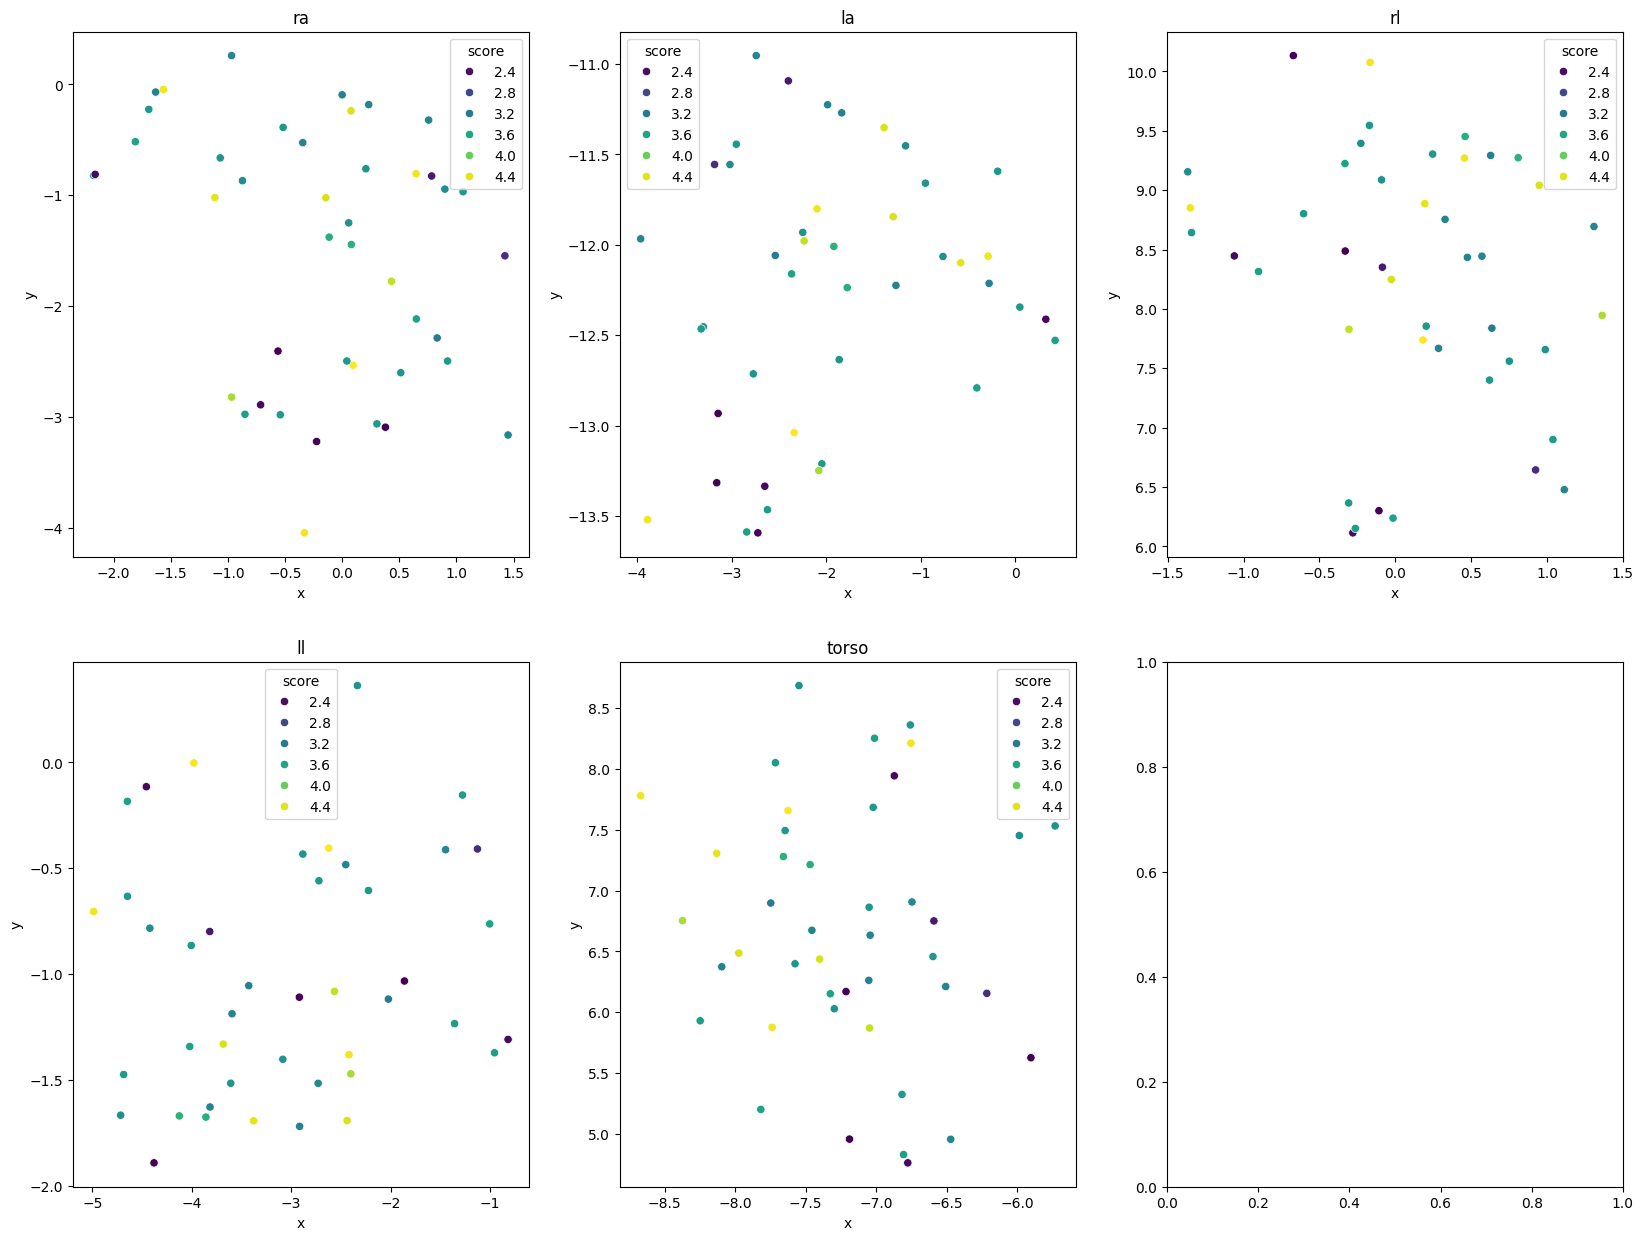

Window size: 100


100%|██████████| 43/43 [00:04<00:00,  9.33it/s]


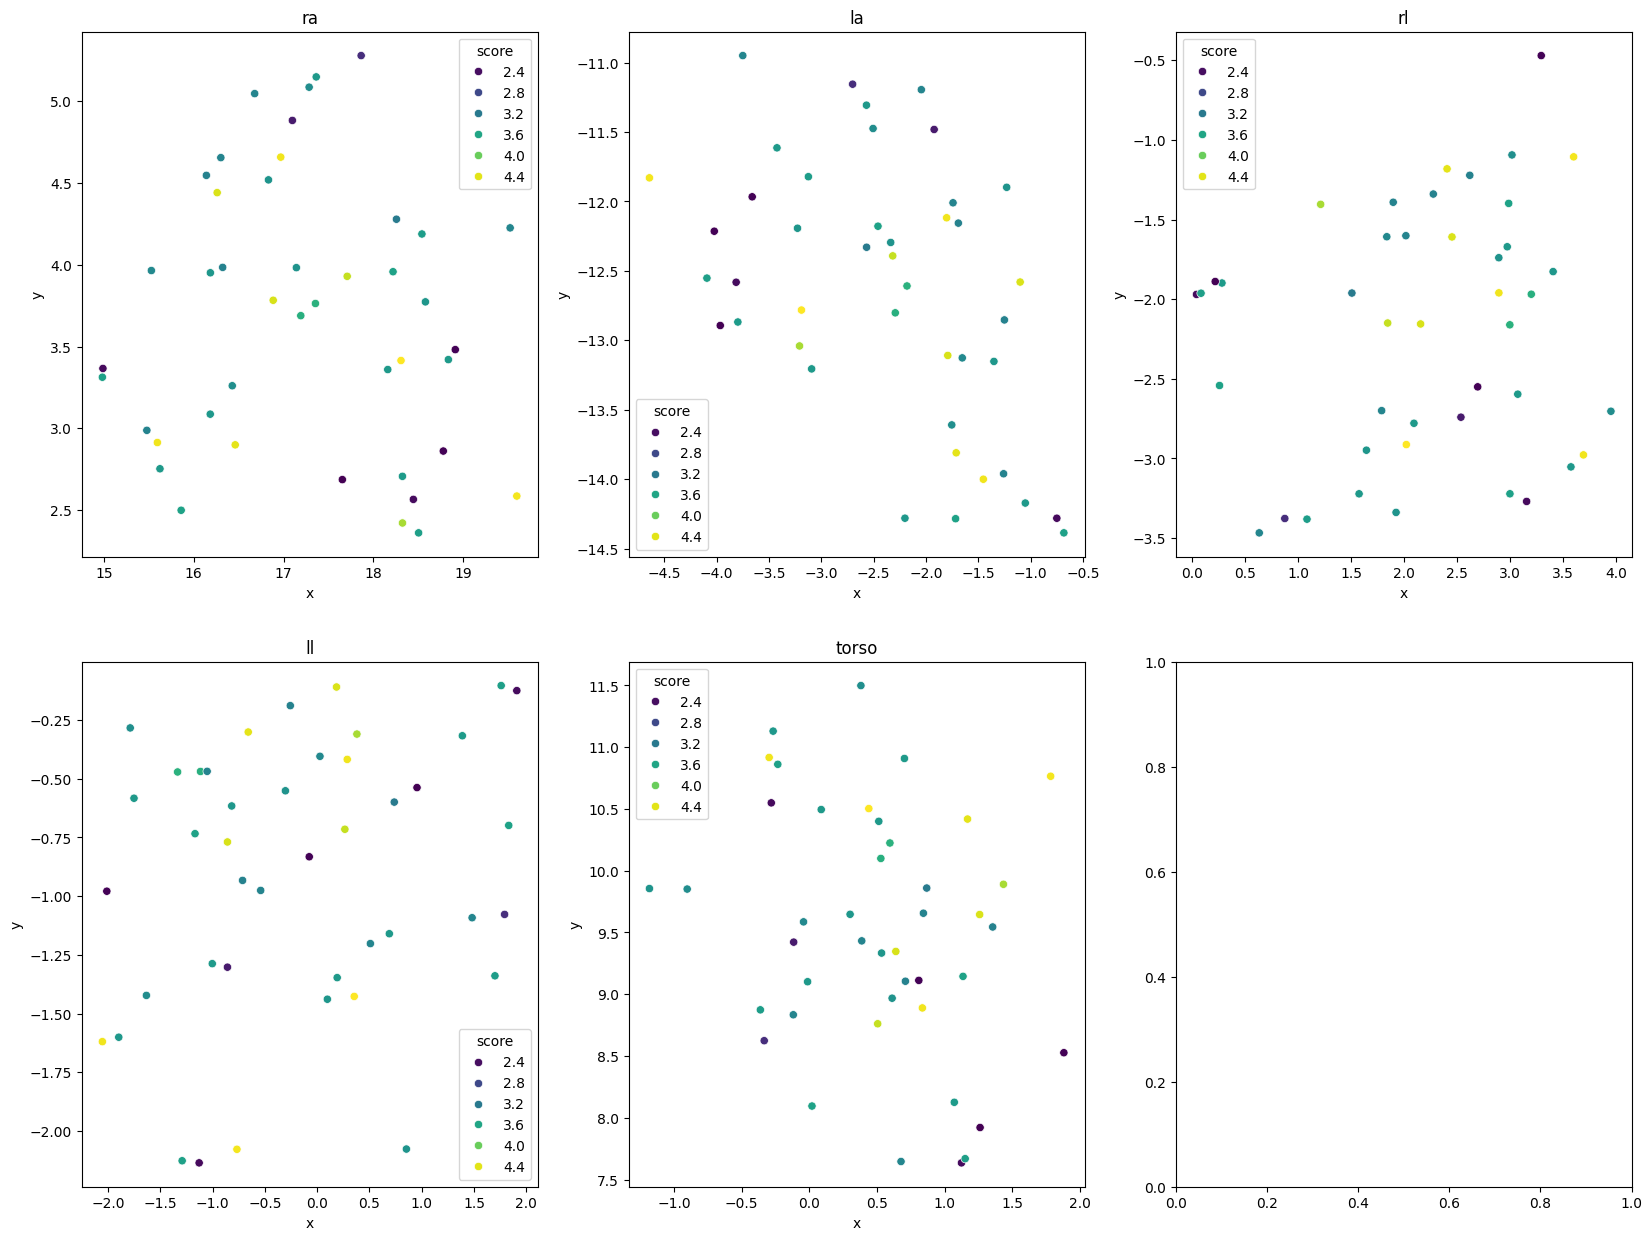

Window size: 105


100%|██████████| 43/43 [00:04<00:00,  9.35it/s]


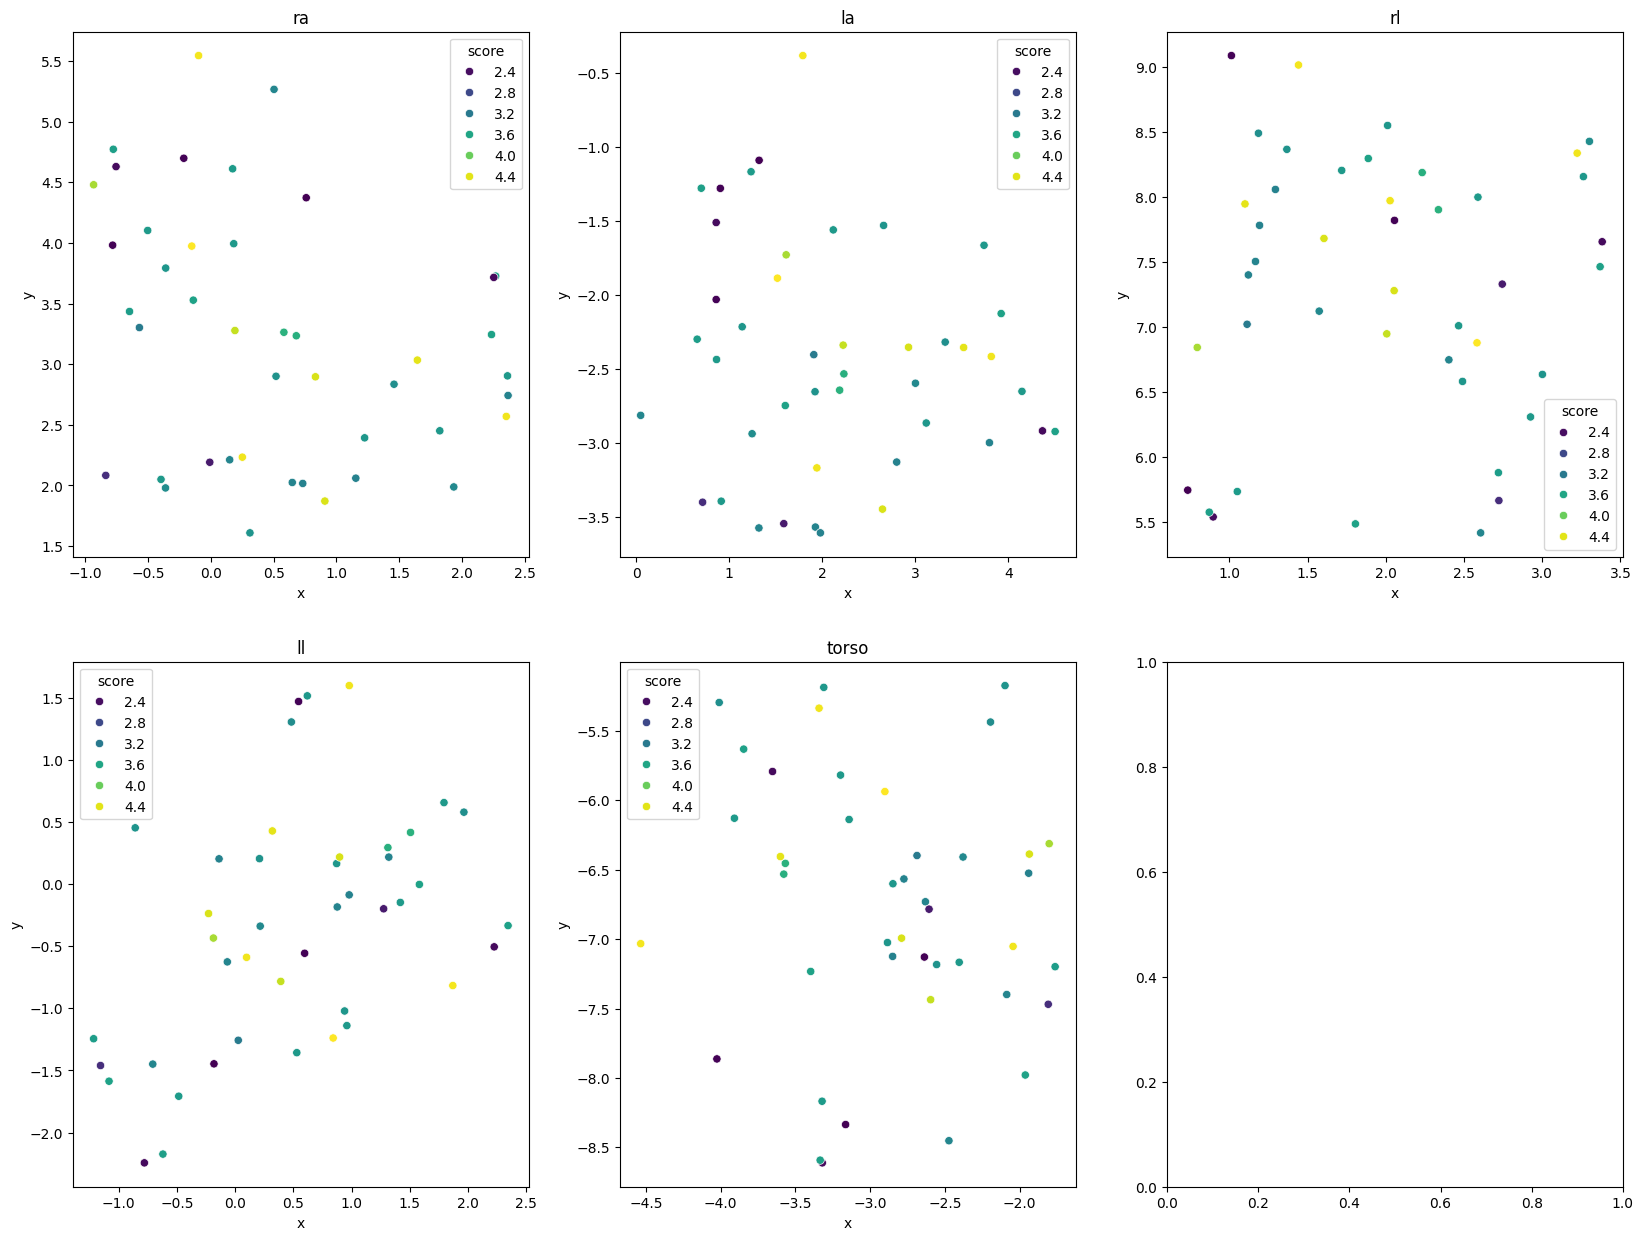

Window size: 110


100%|██████████| 43/43 [00:04<00:00,  9.34it/s]


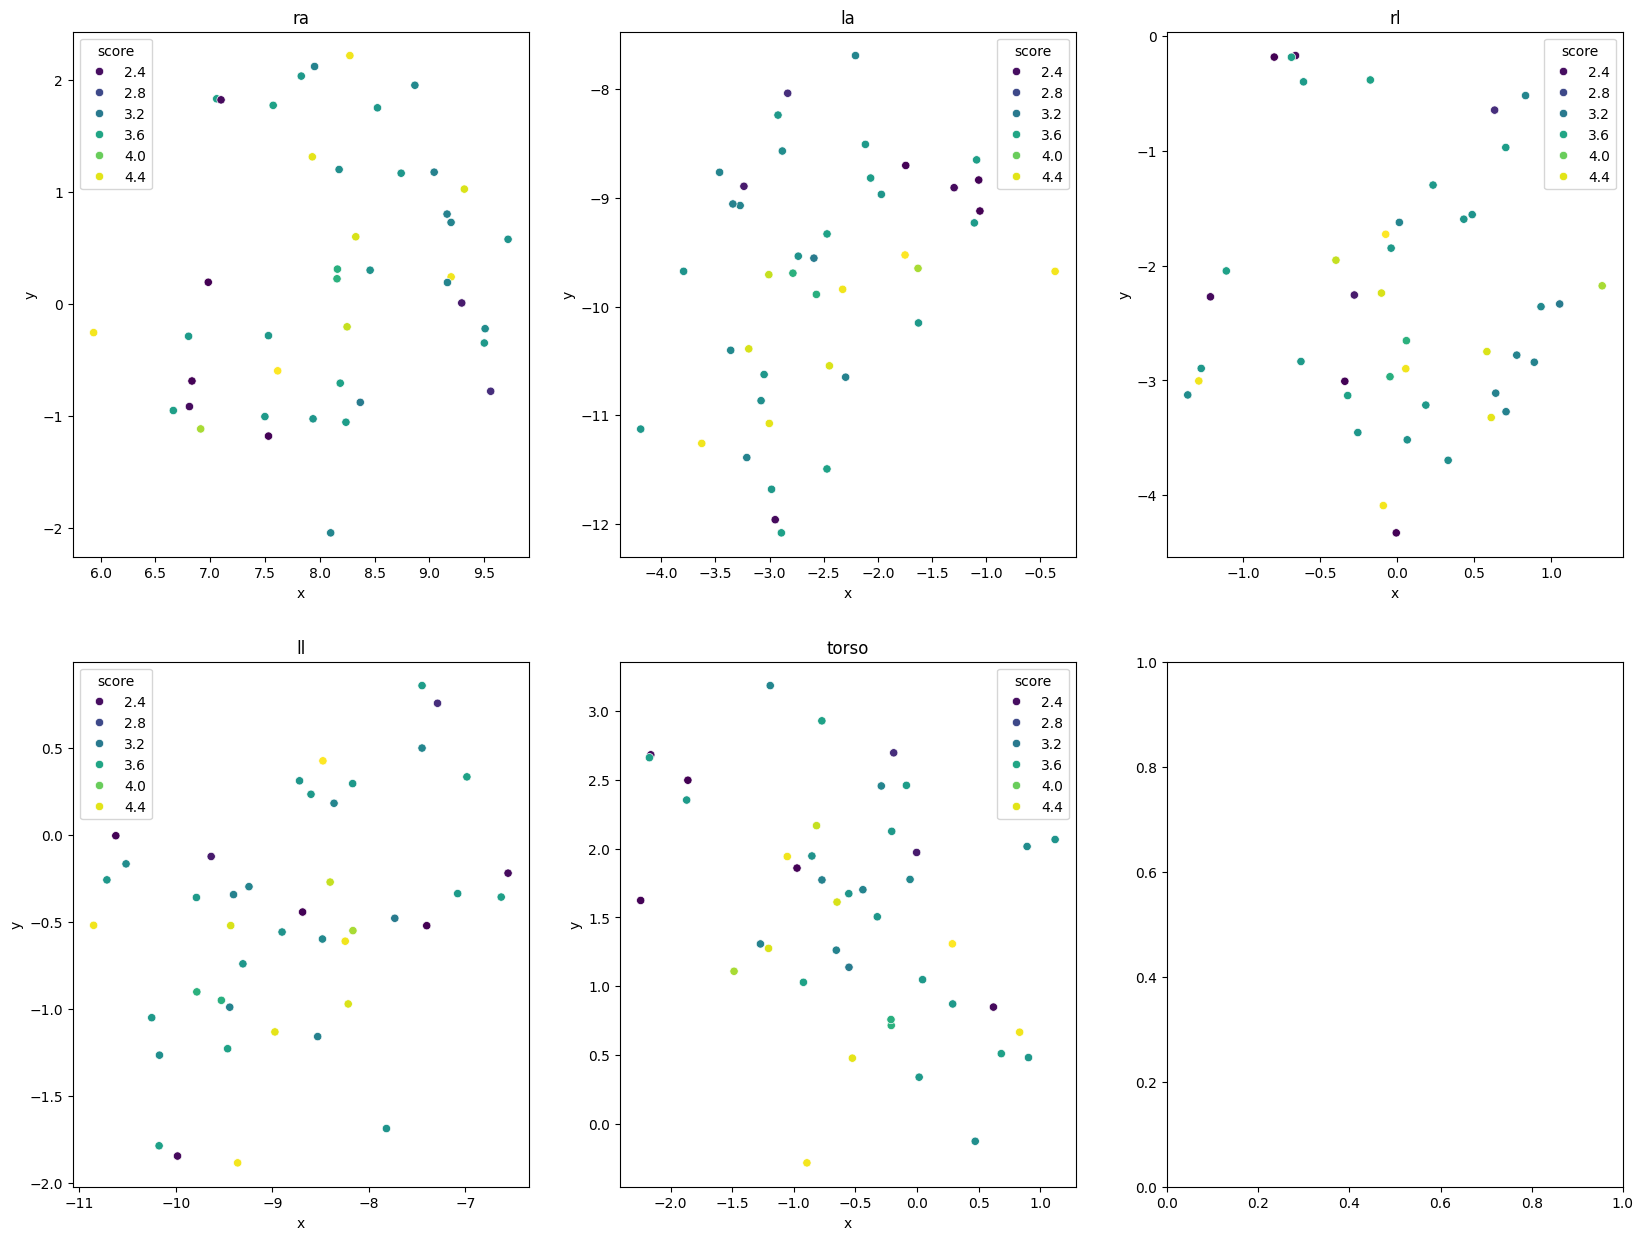

Window size: 115


100%|██████████| 43/43 [00:04<00:00,  9.43it/s]


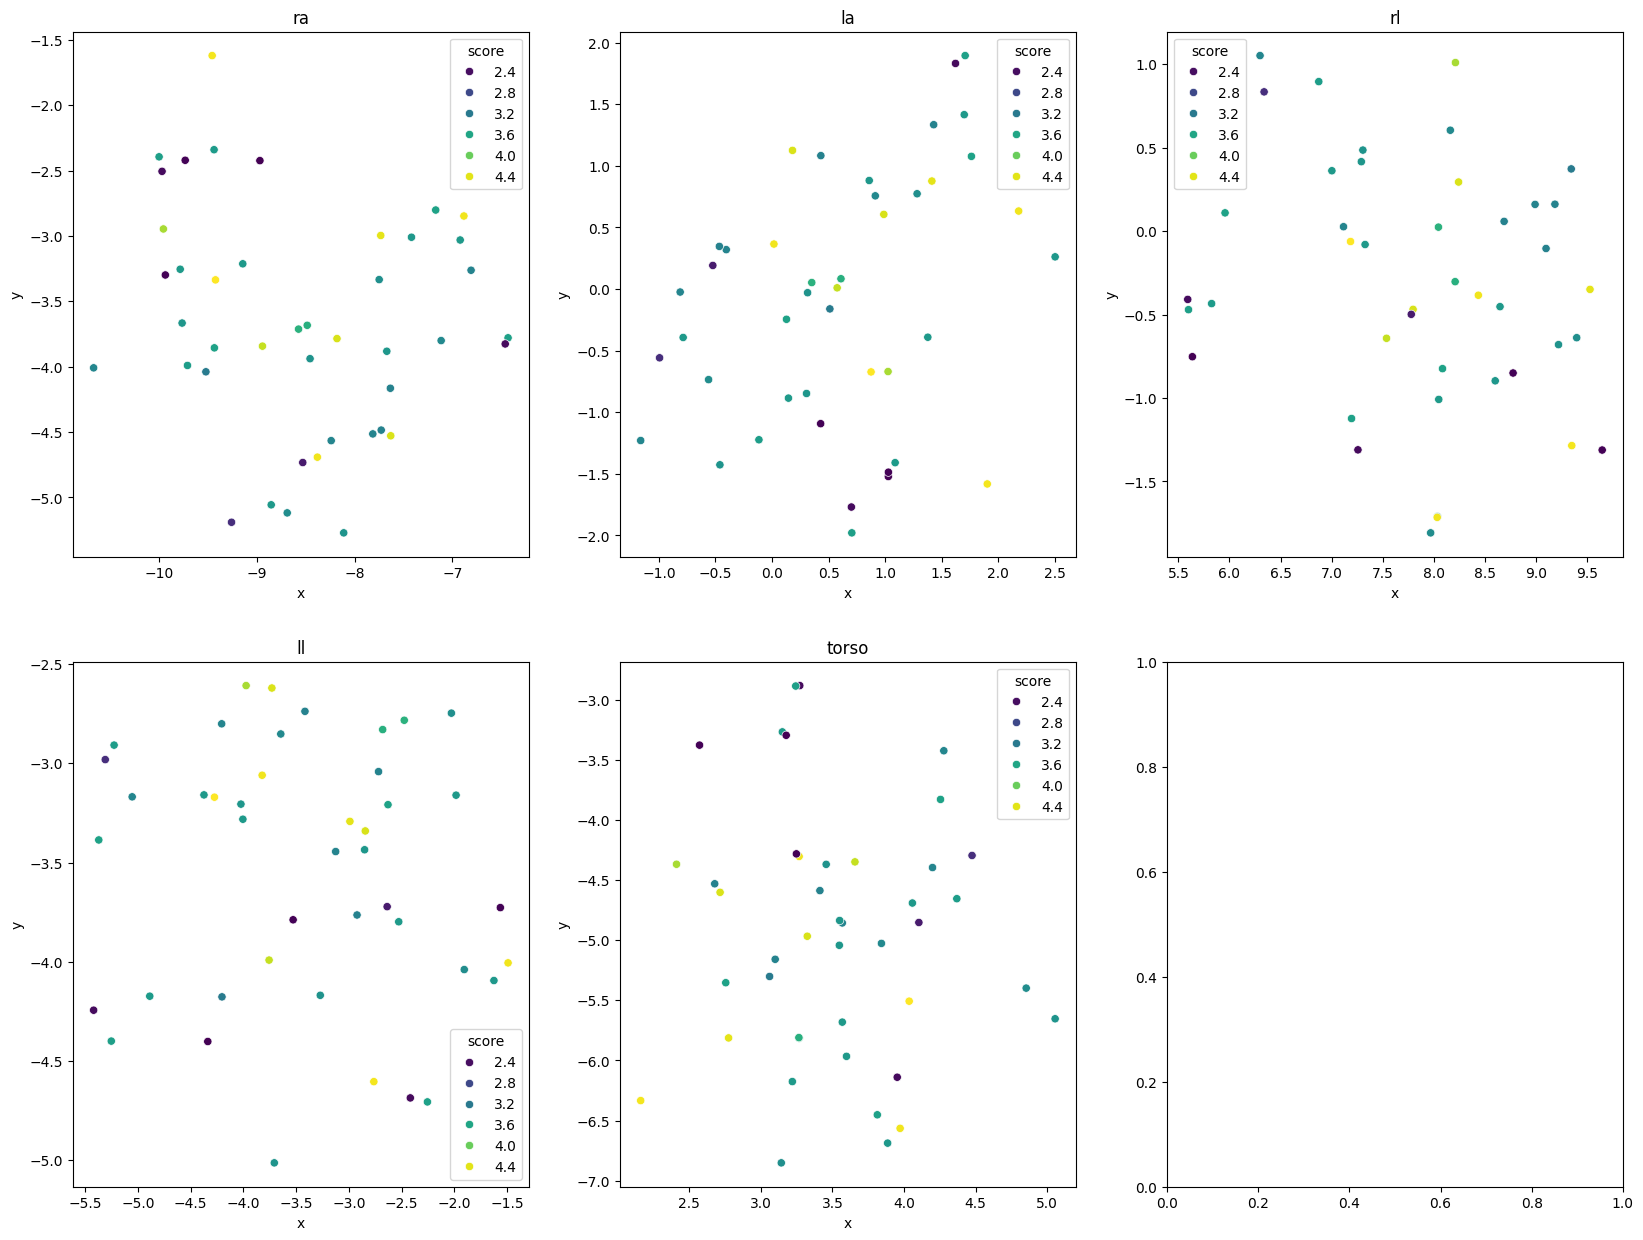

Window size: 120


100%|██████████| 43/43 [00:04<00:00,  9.72it/s]


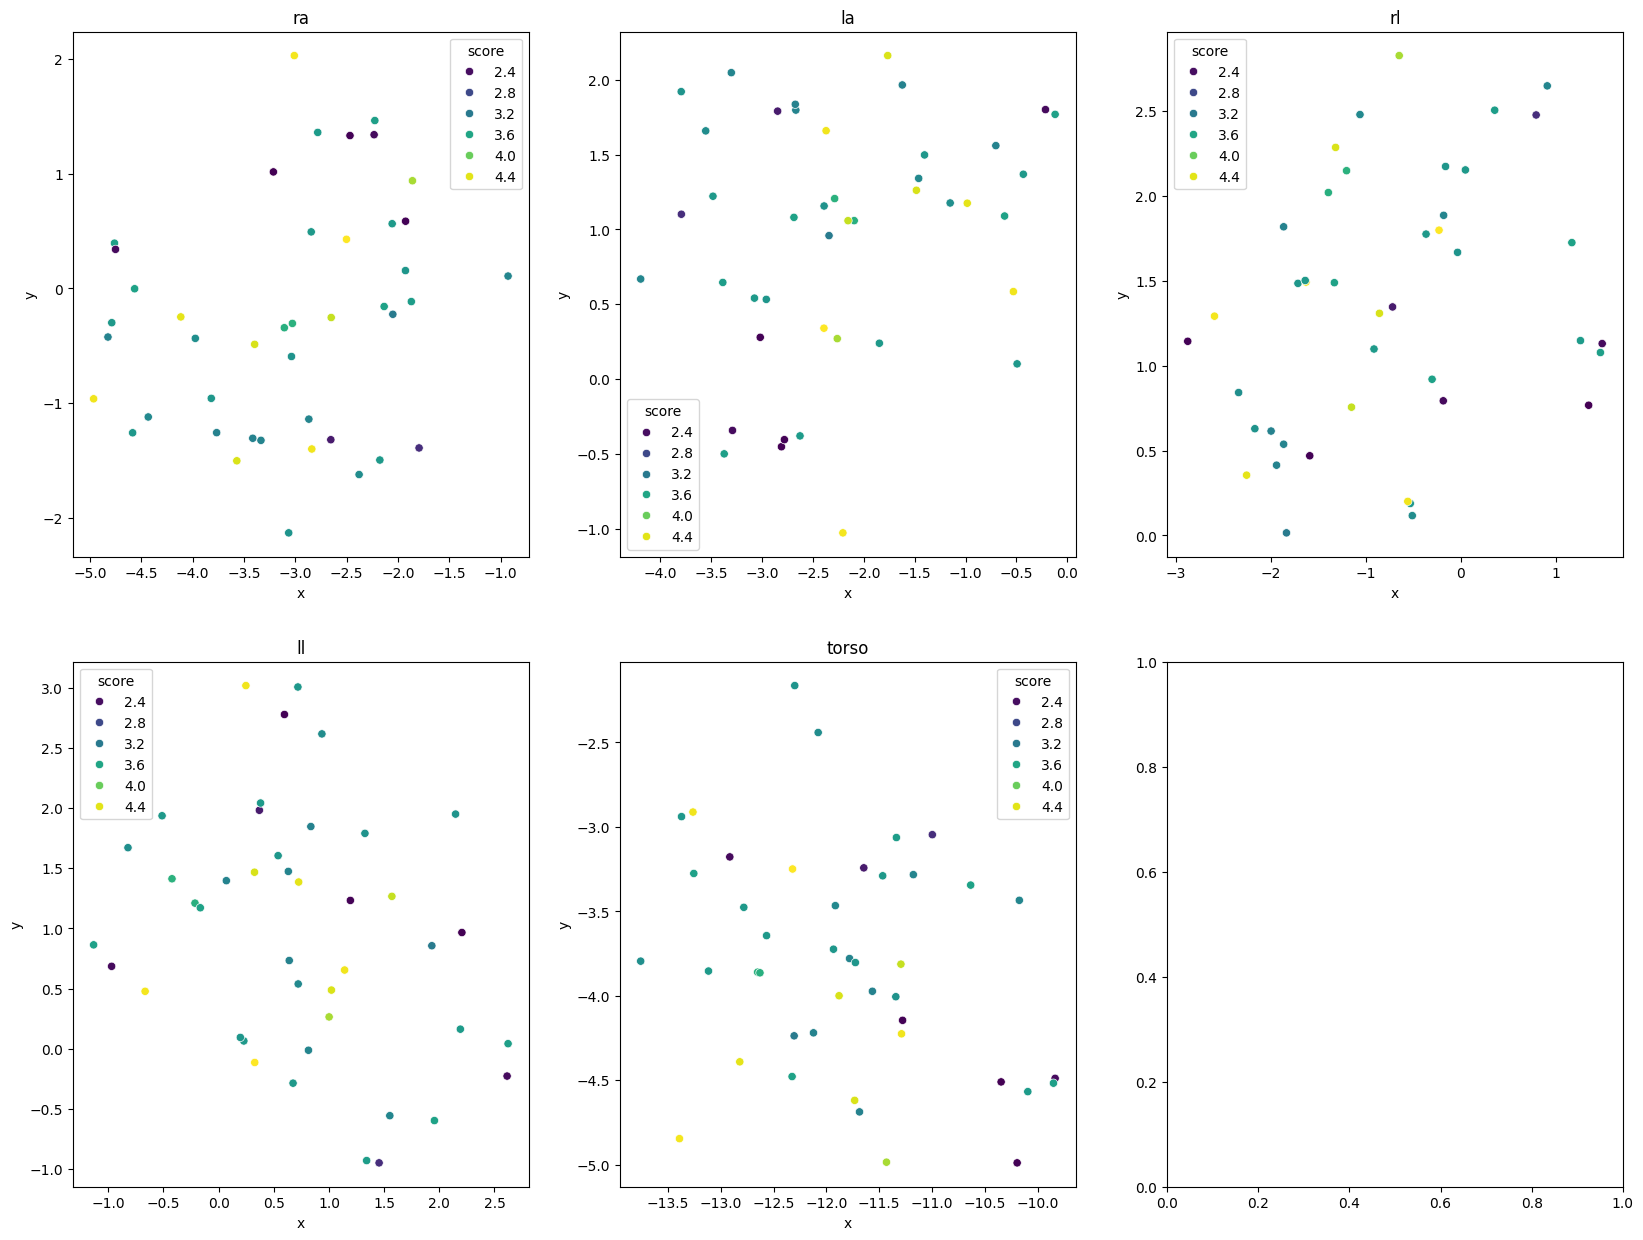

Window size: 125


100%|██████████| 43/43 [00:04<00:00,  9.78it/s]


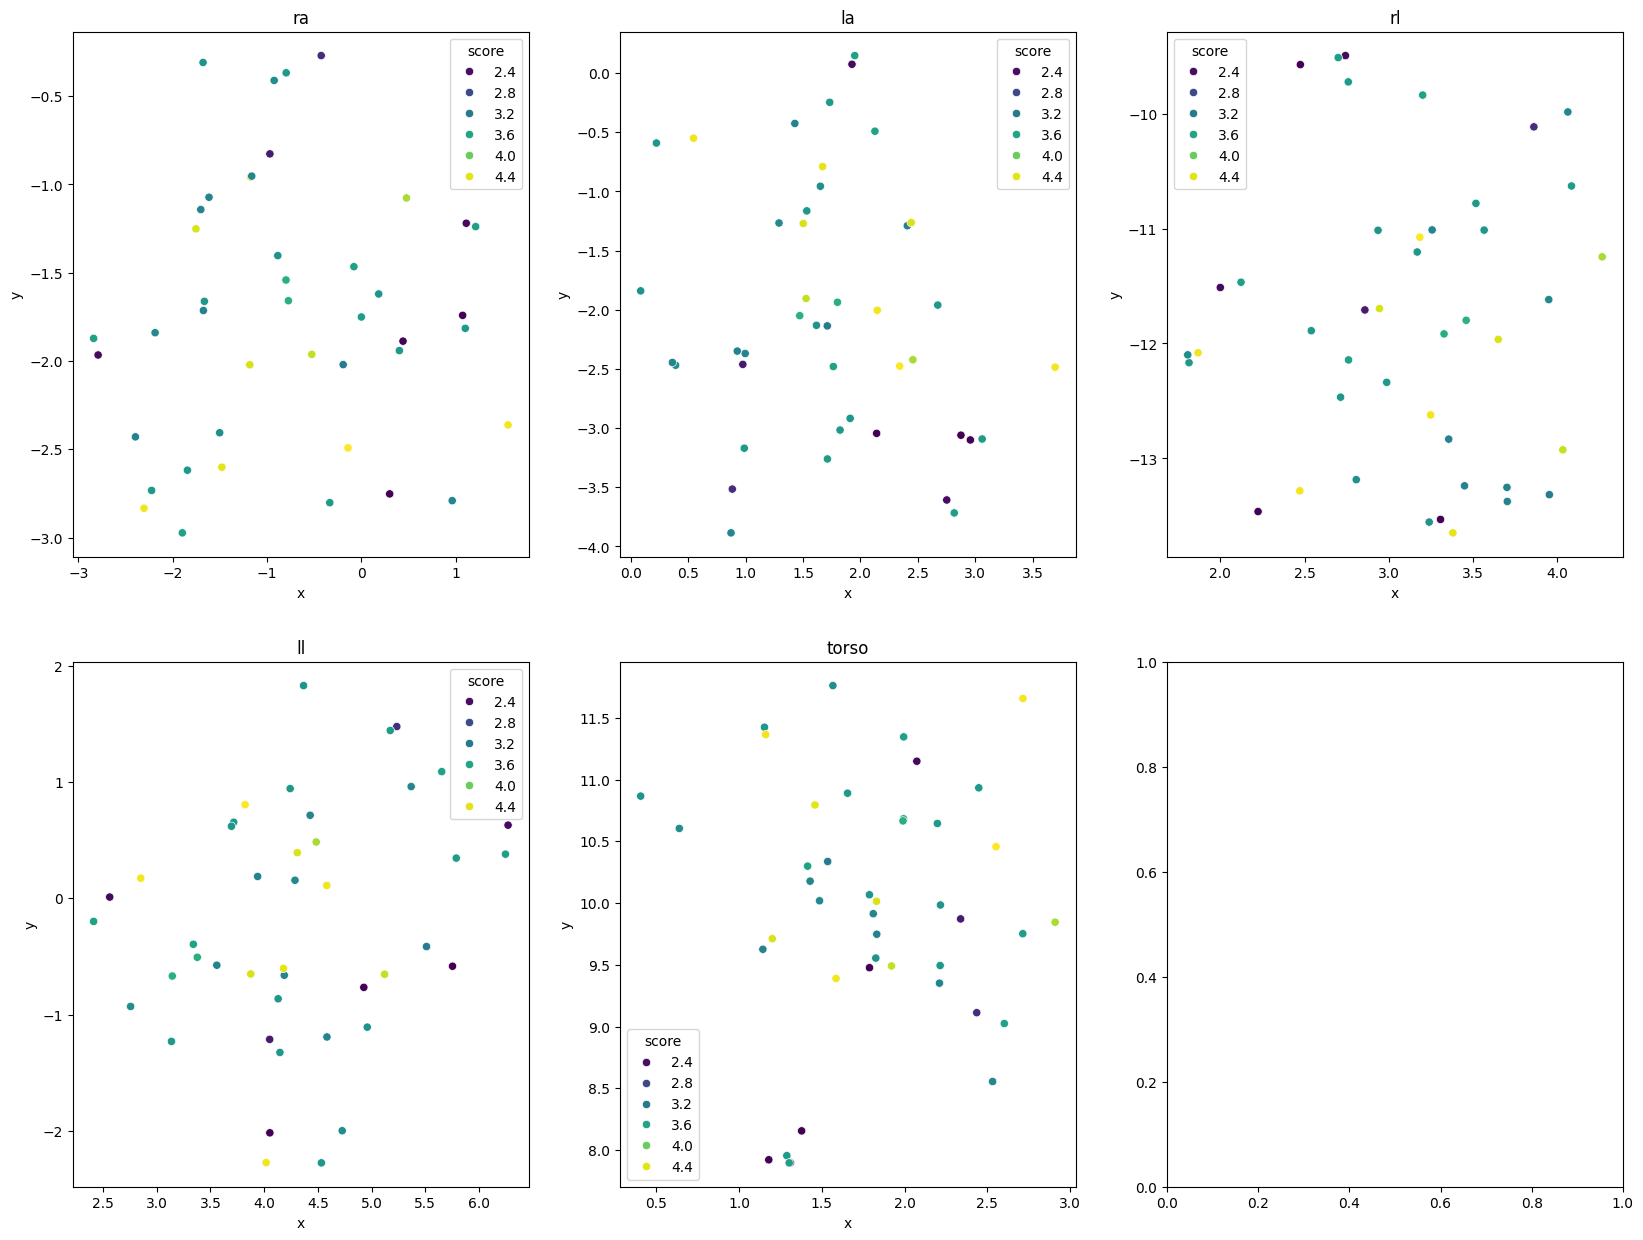

Window size: 130


100%|██████████| 43/43 [00:04<00:00,  9.78it/s]


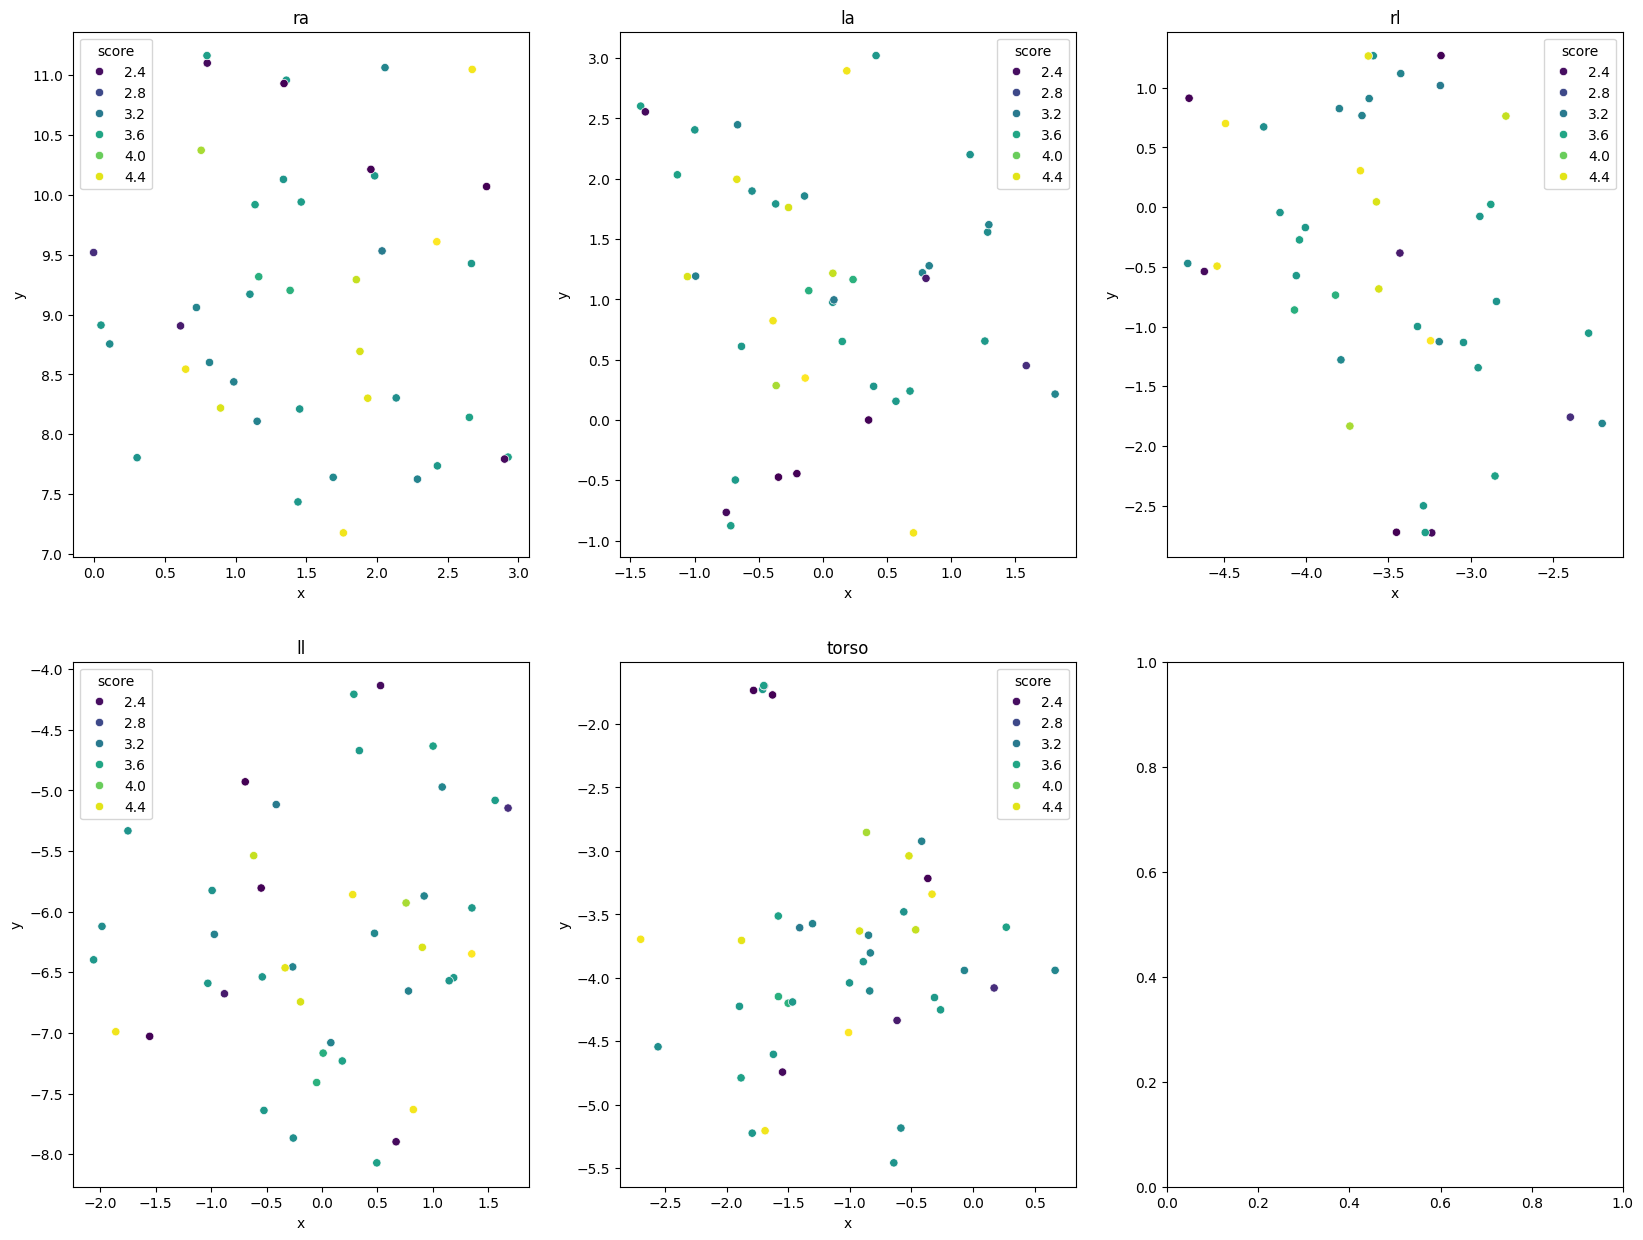

Window size: 135


100%|██████████| 43/43 [00:04<00:00,  9.73it/s]


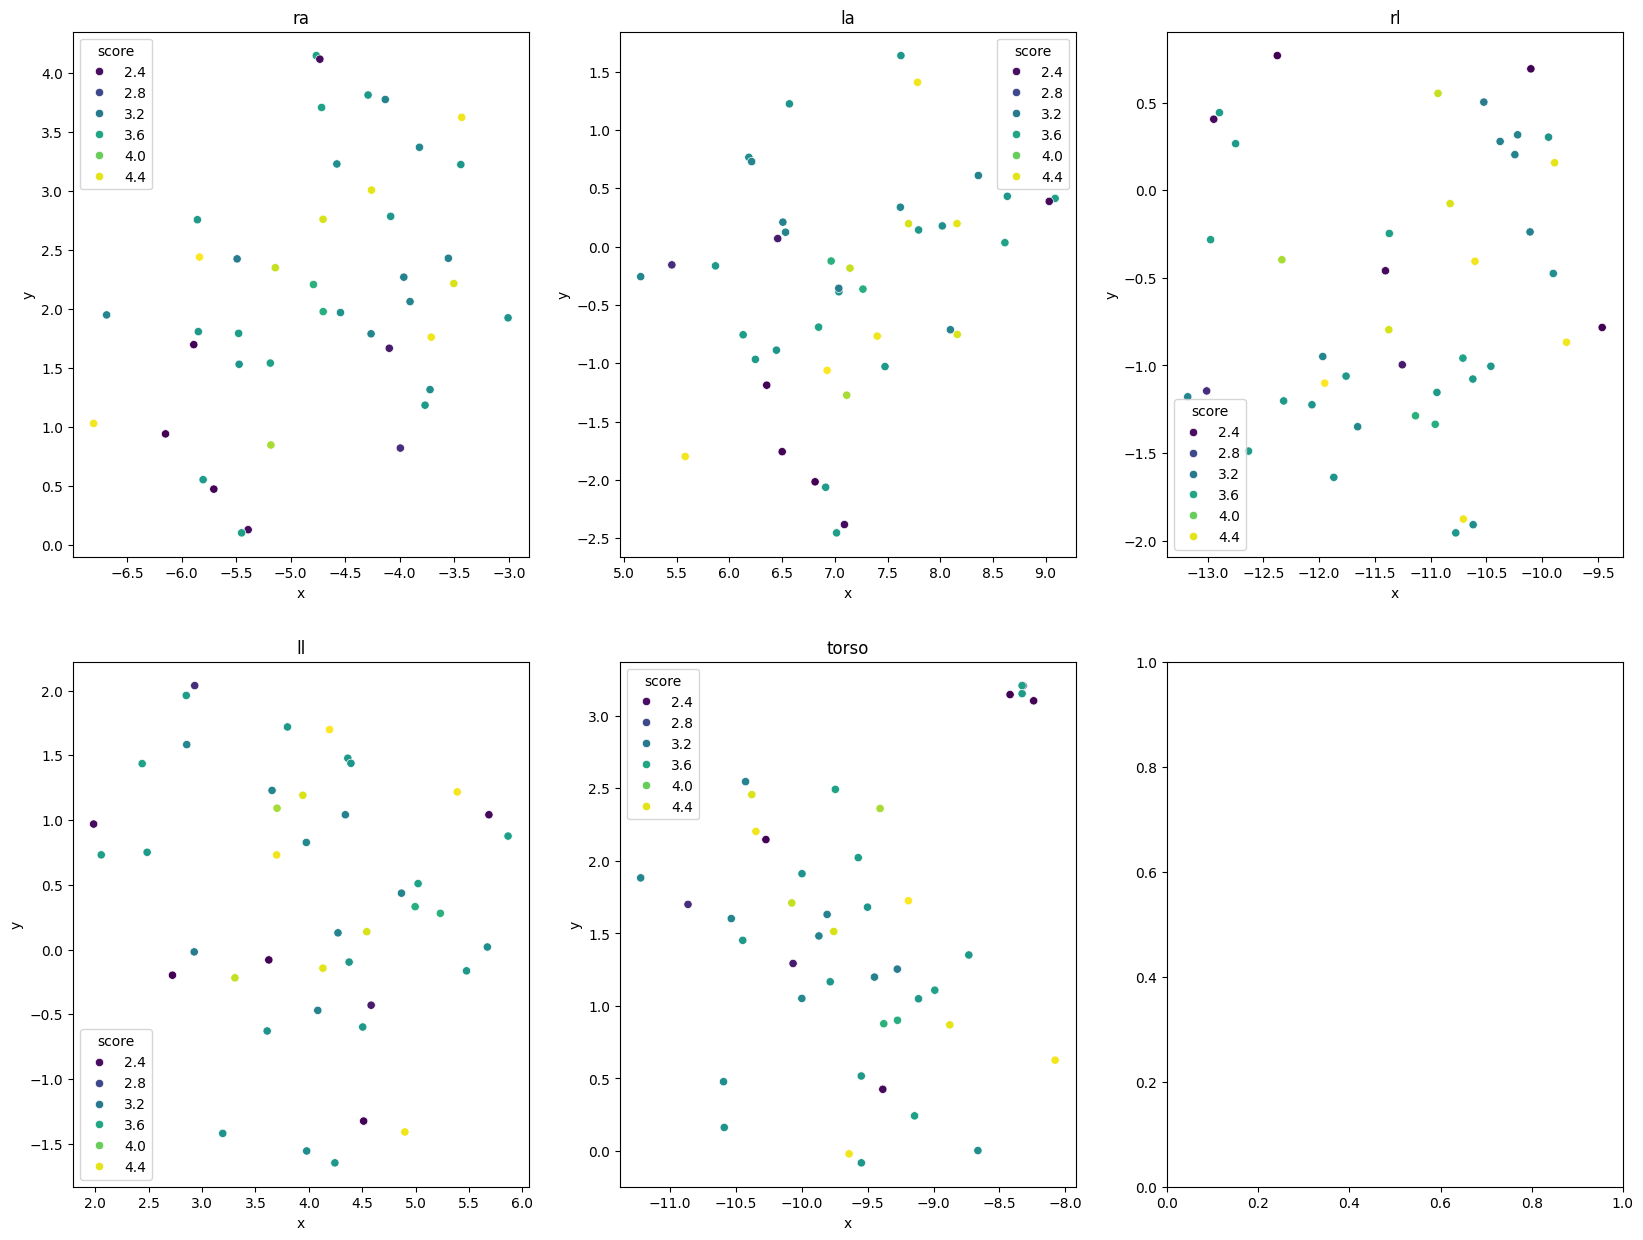

Window size: 140


100%|██████████| 43/43 [00:04<00:00,  9.74it/s]


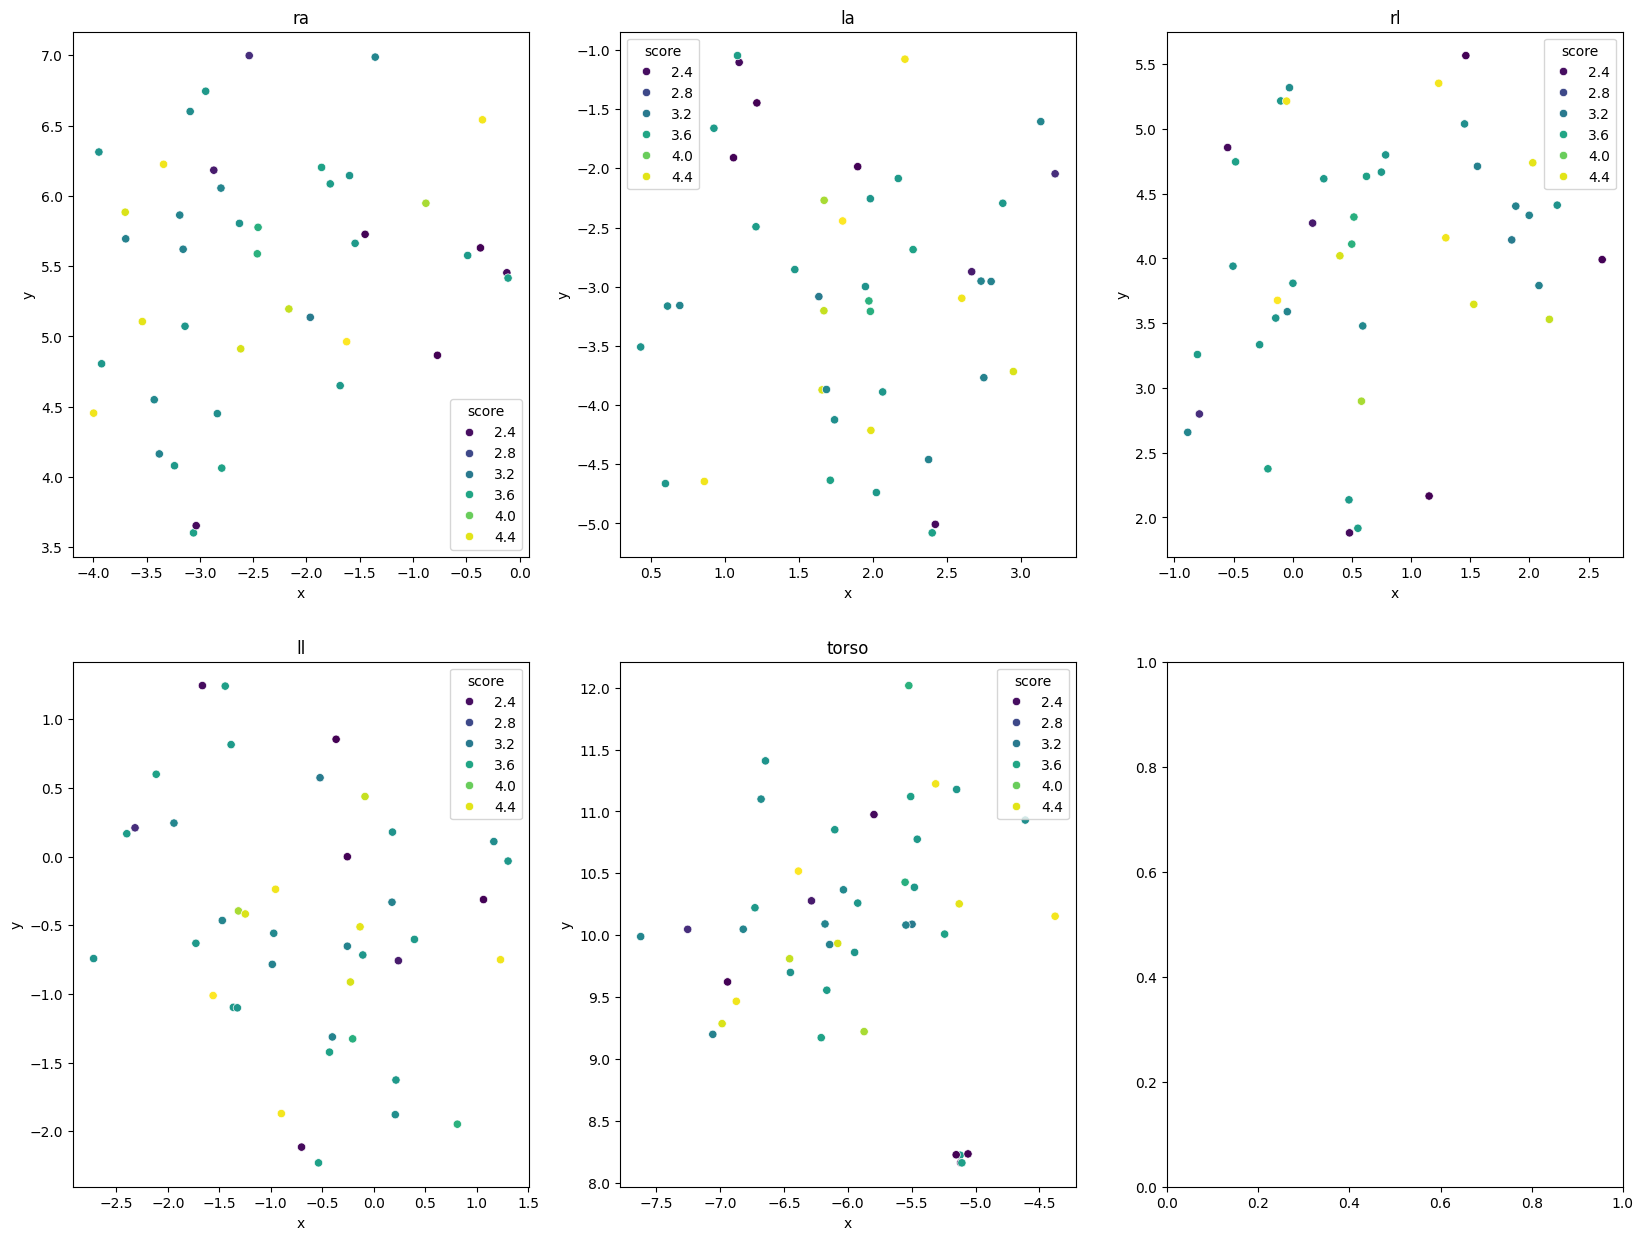

Window size: 145


100%|██████████| 43/43 [00:04<00:00,  9.66it/s]


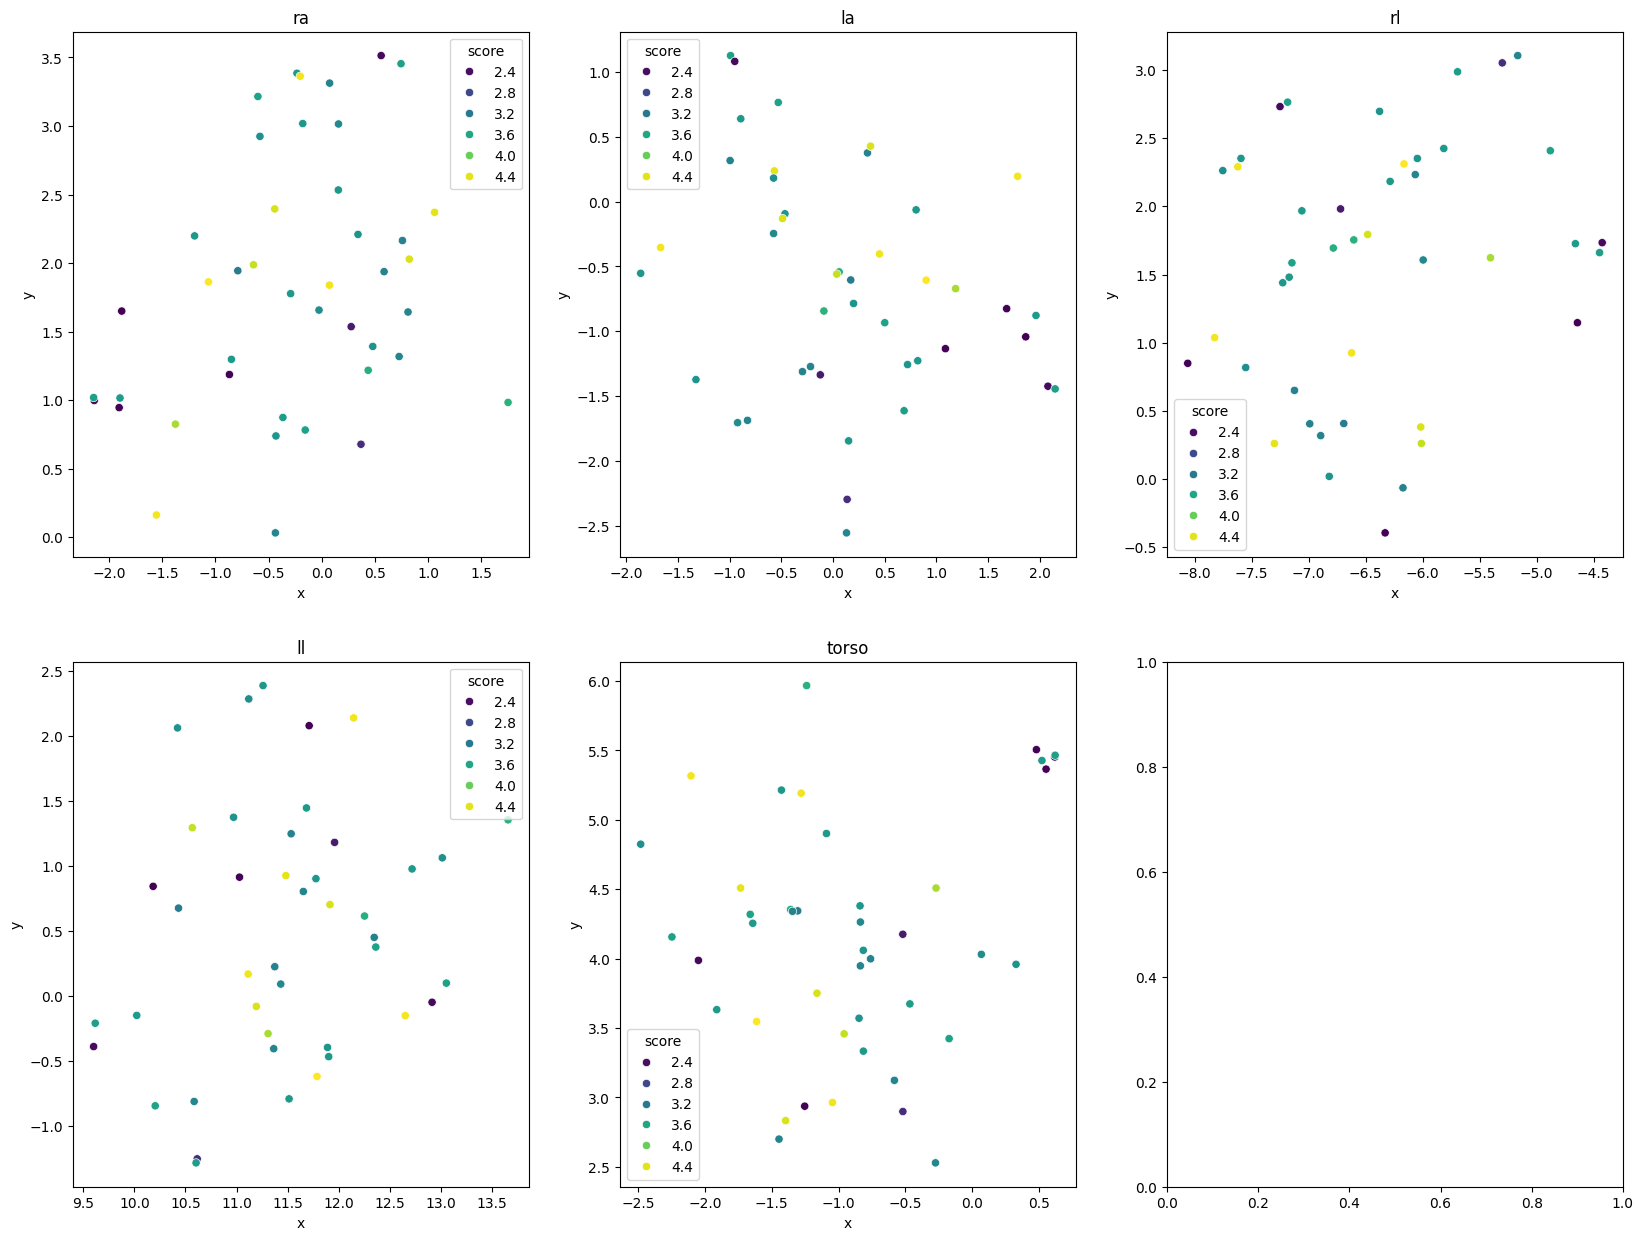

Window size: 150


100%|██████████| 43/43 [00:04<00:00,  9.66it/s]


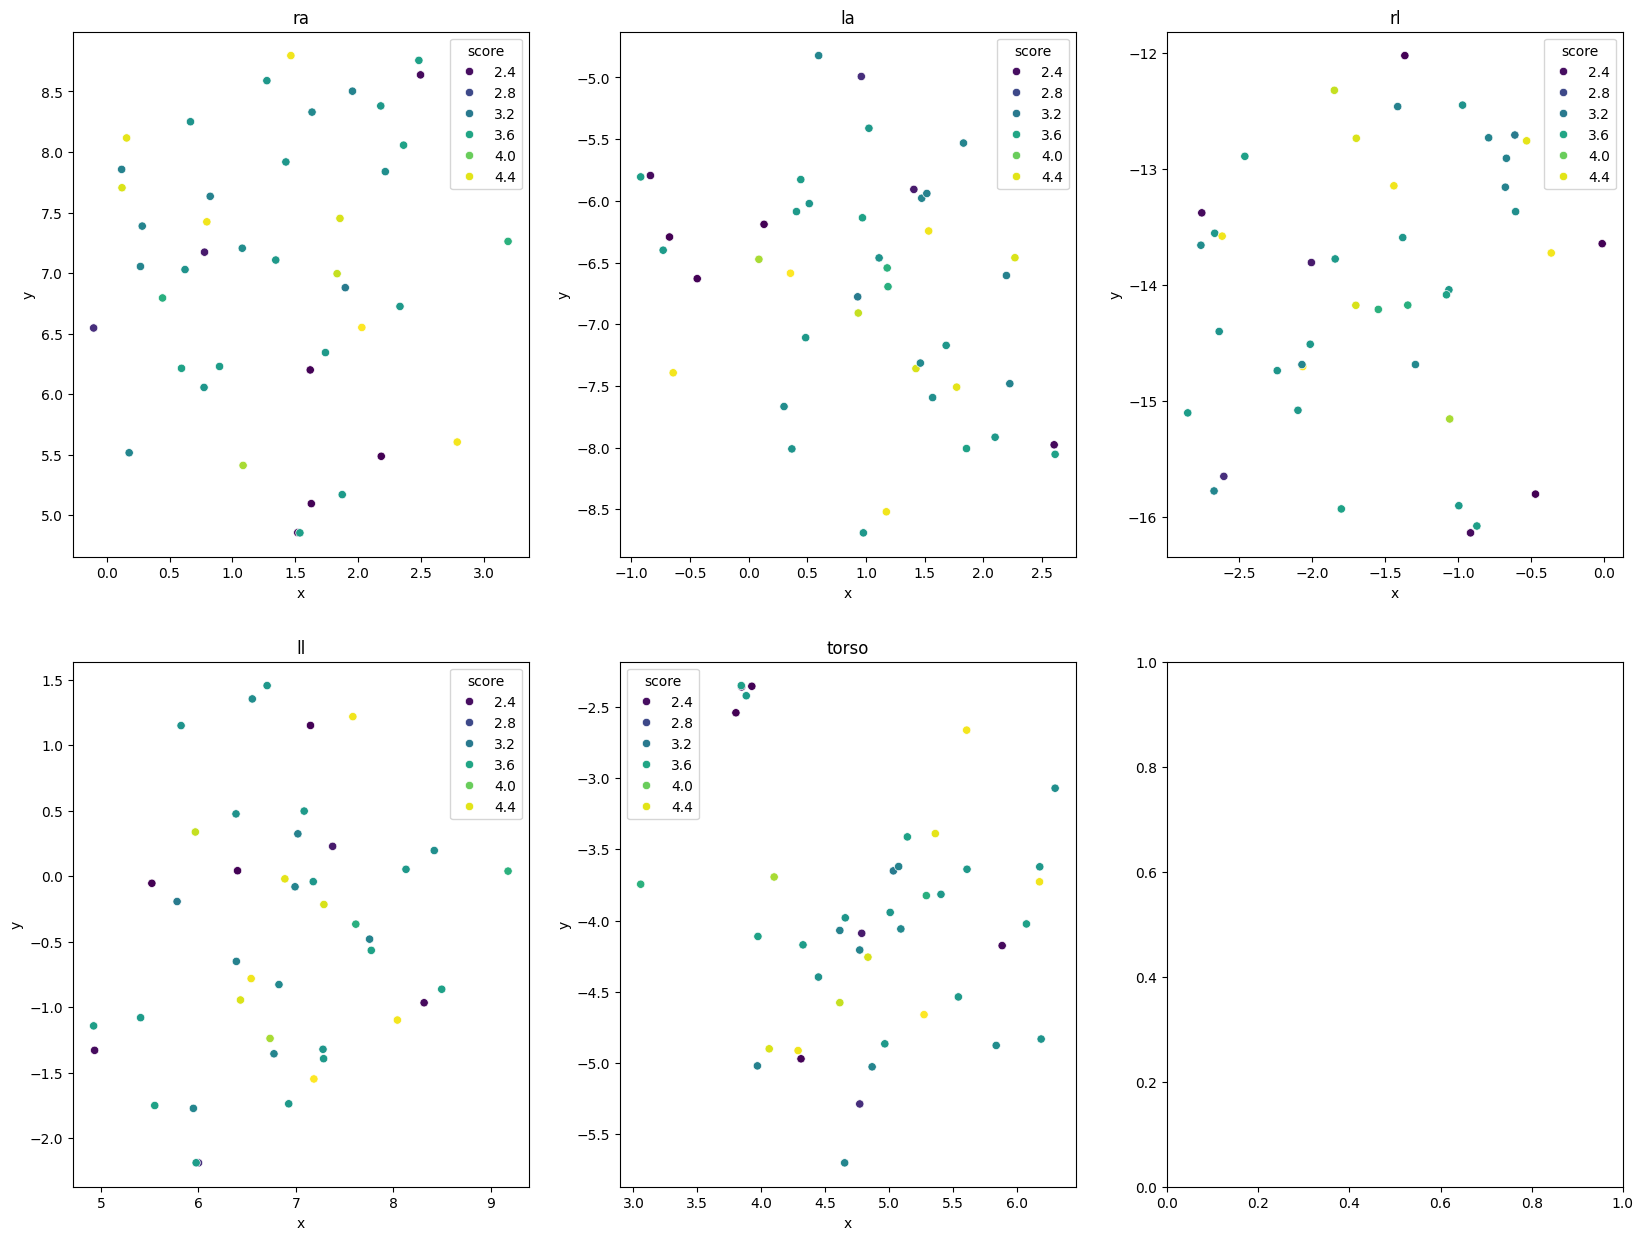

Window size: 155


100%|██████████| 43/43 [00:04<00:00,  9.80it/s]


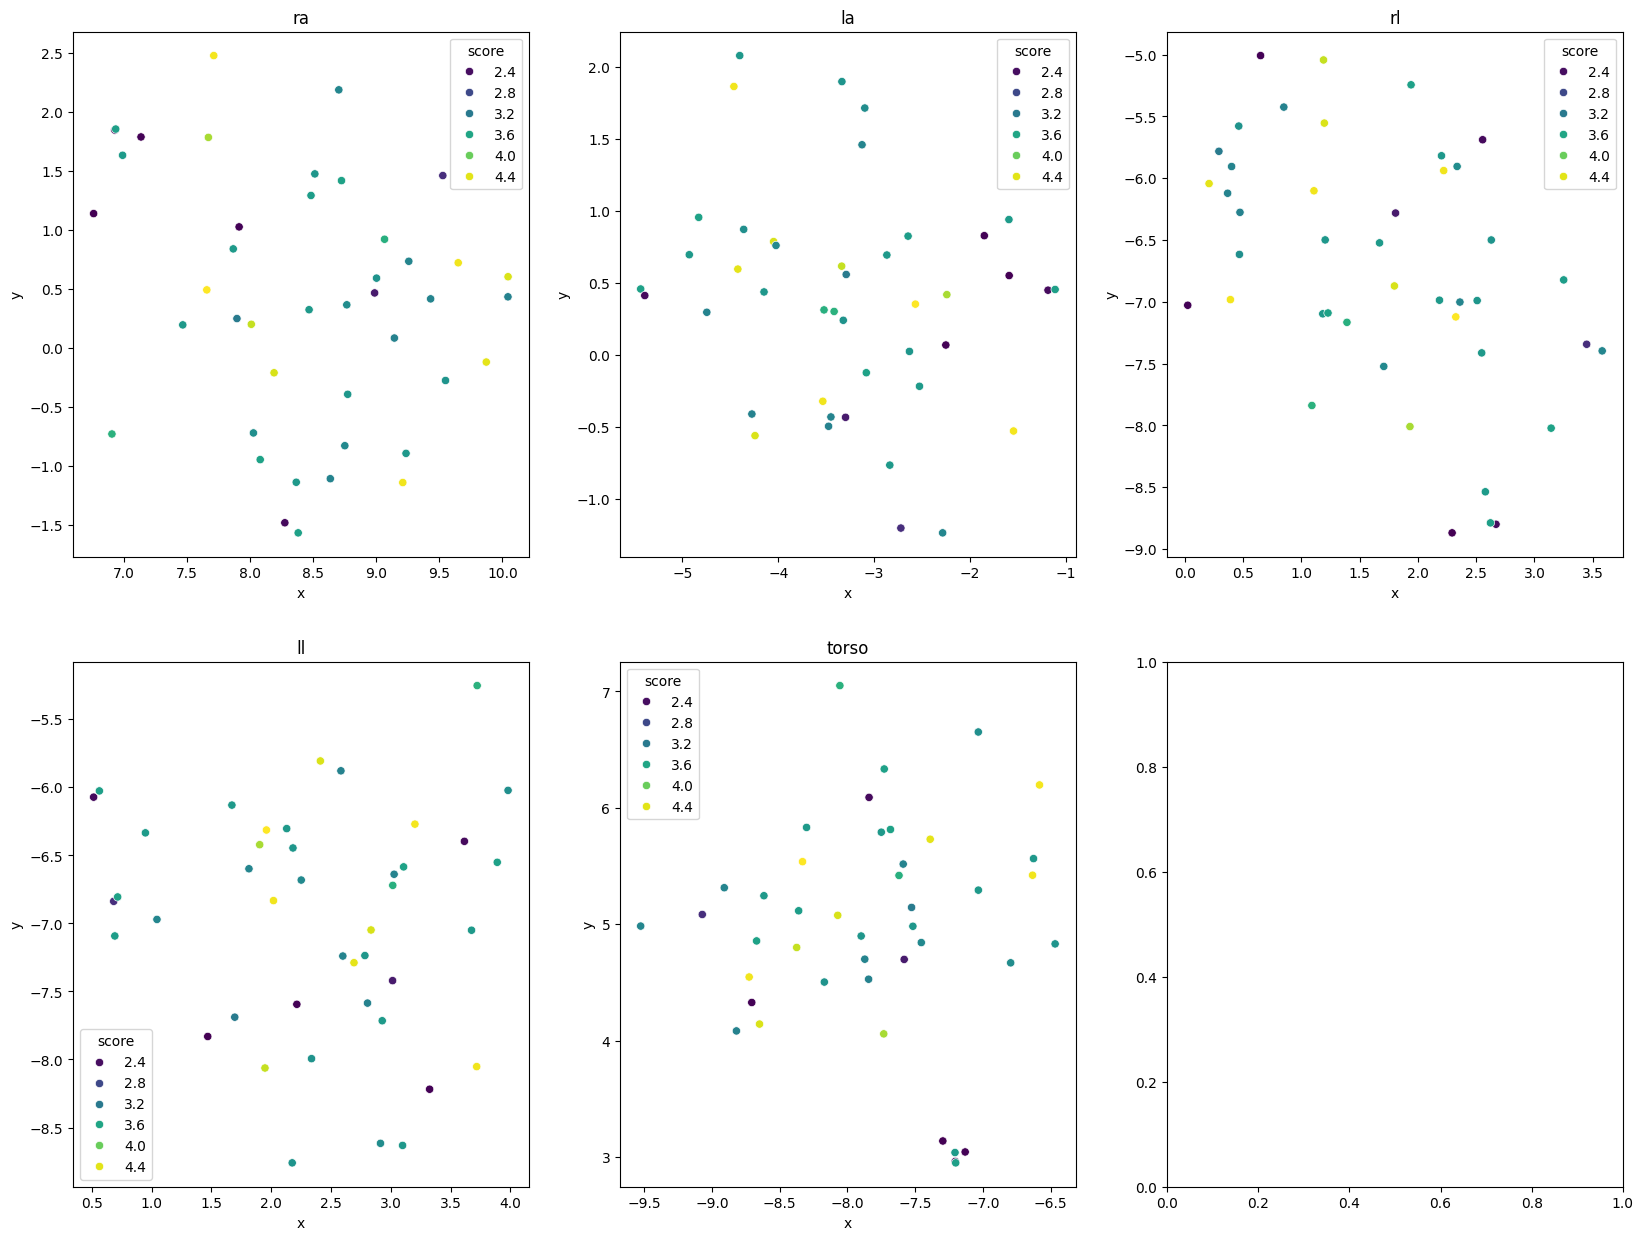

Window size: 160


100%|██████████| 43/43 [00:04<00:00,  9.52it/s]


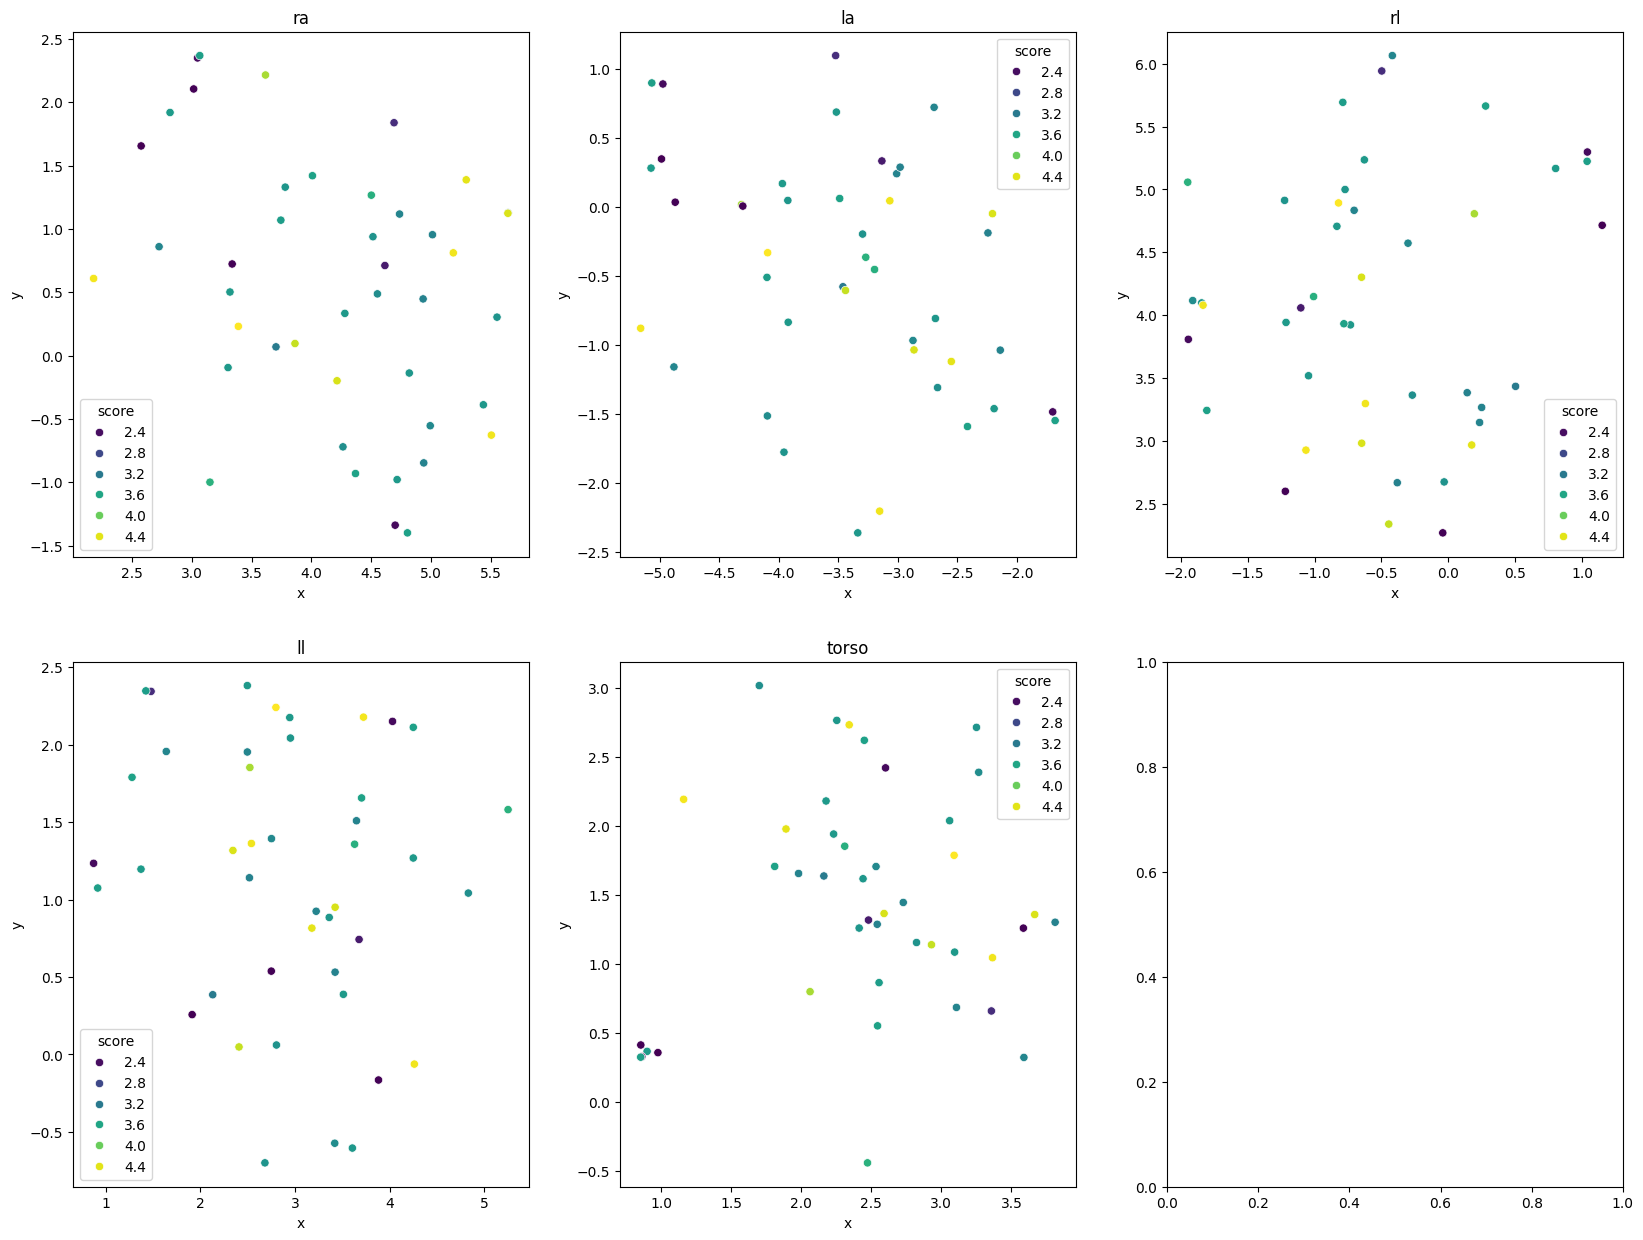

Window size: 165


100%|██████████| 43/43 [00:04<00:00,  9.78it/s]


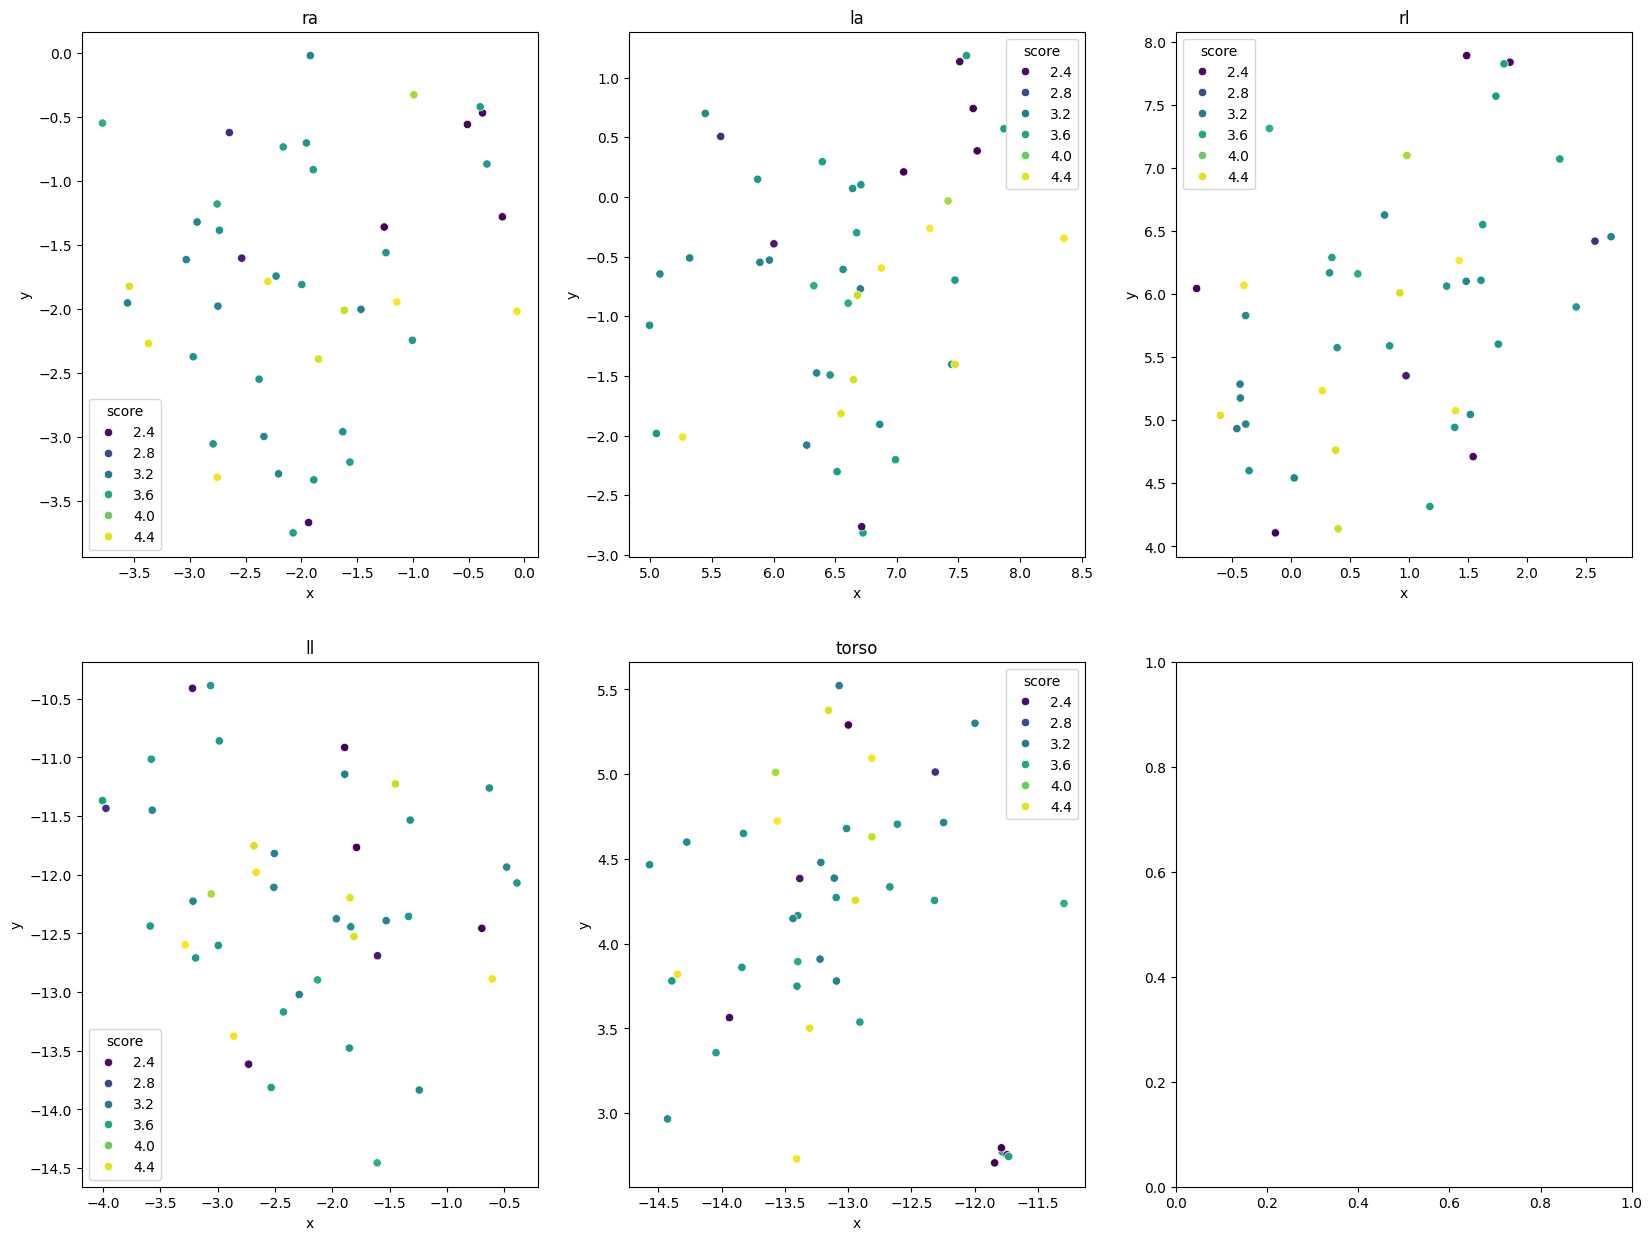

Window size: 170


100%|██████████| 43/43 [00:04<00:00,  8.62it/s]


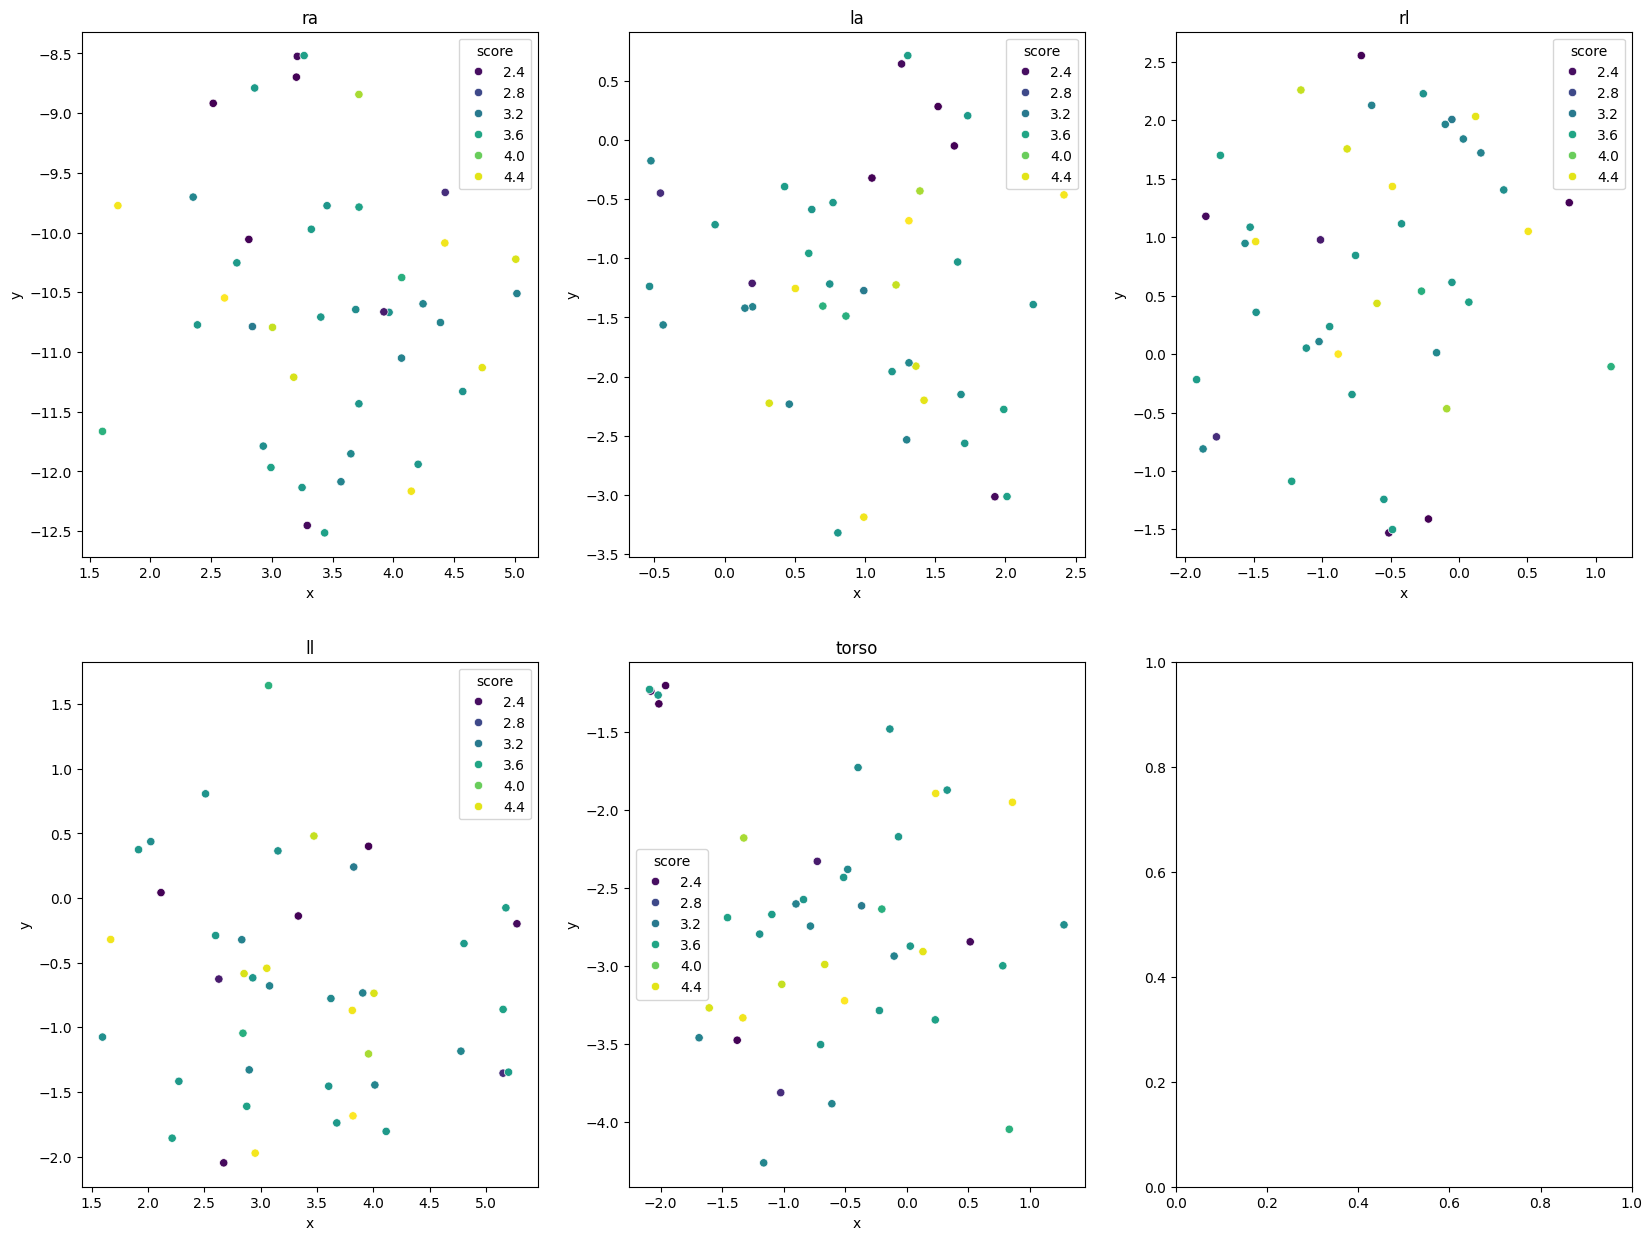

Window size: 175


100%|██████████| 43/43 [00:04<00:00,  9.42it/s]


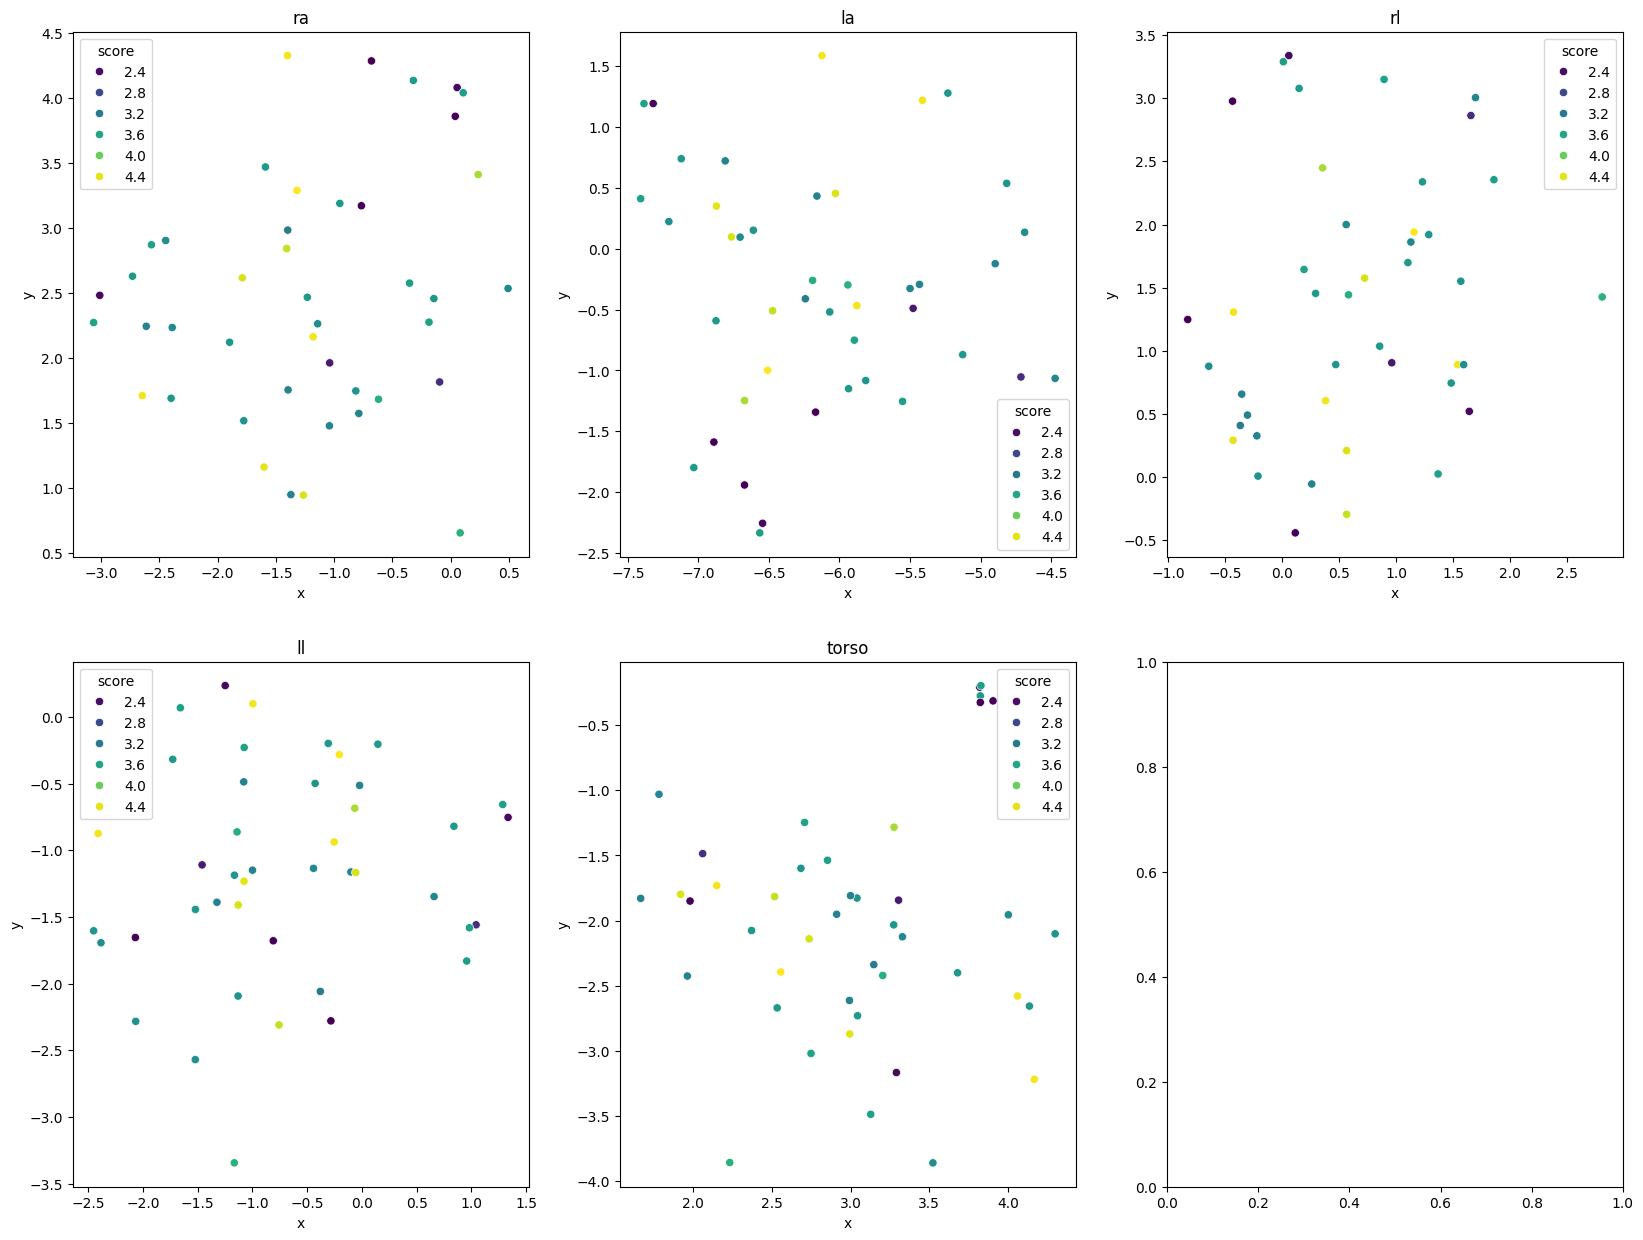

In [41]:
for window_size in range(15, 180, 5):

    print(f'Window size: {window_size}')

    resulting_embeddings = {}

    for vid in tqdm.tqdm(os.listdir(JSON_DATA_DIR)):
        vid_path = JSON_DATA_DIR + vid
        analyser = VolleyWrapper(vid_path, vid_path)
        # analyser.set_window_size(window_size)
        embeddings = analyser.embeddings(analyser.seq1, window_size, 200)[0]
        # ['ra', 'la', 'rl', 'll', 'torso']
        ra = embeddings[0]
        la = embeddings[1]
        rl = embeddings[2]
        ll = embeddings[3]
        torso = embeddings[4]

        resulting_embeddings[vid] = [ra, la, rl, ll, torso]

    fig, ax = plt.subplots(2, 3, figsize=(20, 15))

    for i, body_part in enumerate(['ra', 'la', 'rl', 'll', 'torso']):
        total_embs = []
        scores_list = []
        for key in resulting_embeddings:
            total_embs.append(resulting_embeddings[key][i])
            score = scores.loc[scores['json_file'] == key, 'totaal_score'].values[0]
            scores_list.append(score)

        total_embs = np.array(total_embs)

        tsne_embs = TSNE(n_components=2).fit_transform(total_embs)

        plot_df = pd.DataFrame(tsne_embs, columns=['x', 'y'])
        plot_df['score'] = scores_list

        sns.scatterplot(data=plot_df, x='x', y='y', hue='score', palette='viridis', ax=ax[i//3][i%3])
        ax[i//3][i%3].set_title(body_part)

    plt.show()